## IMPORT PACKAGES

In [209]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import datetime
import pandas_profiling
import datasist as ds                            #For data cleaning
from statsmodels.stats.outliers_influence import variance_inflation_factor  #multicollinearity
print('pandas version:',pd.__version__)
import pickle
# Show plots in jupyter notebook
%matplotlib inline
# Set plot style
sns.set(color_codes=True)
# Set maximum number of columns to be displayed
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',150)
plt.style.use('ggplot')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

pandas version: 1.1.3


# Loading data

In [2]:
#Load loan data
loan_data = pd.read_csv('loan_data_train.csv')
loan_data.head(4)

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,...,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,int_rate,grade
0,545977,48654285,25000.0,25000.0,25000.0,36 months,833.83,C1,Respiratory Manager,10+ years,MORTGAGE,106000.0,Source Verified,May-2015,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,913xx,CA,18.99,0.0,Feb-1995,665.0,669.0,1.0,44.0,NaN,31.0,0.0,14165.0,63.2,45.0,w,0.0,0.0,26645.500000,26645.50,25000.00,1645.50,0.0,0.0,0.0,Jan-2016,22510.49,NaN,Dec-2017,734.0,730.0,...,NaN,NaN,NaN,NaN,22400.0,NaN,NaN,NaN,12.0,13289.0,1328.0,85.7,0.0,0.0,243.0,174.0,6.0,6.0,3.0,6.0,NaN,6.0,NaN,0.0,7.0,13.0,9.0,12.0,20.0,17.0,21.0,13.0,31.0,0.0,0.0,0.0,3.0,97.8,57.1,0.0,0.0,413442.0,78492.0,9300.0,69882.0,N,Cash,N,12.29,C
1,892728,5626429,3125.0,3125.0,3125.0,36 months,111.84,C5,Broadcom Corporation,10+ years,RENT,112000.0,Not Verified,Jun-2013,Fully Paid,n,NaN,debt_consolidation,Personal,926xx,CA,10.95,1.0,Jul-2000,680.0,684.0,0.0,23.0,NaN,6.0,0.0,5420.0,73.2,16.0,f,0.0,0.0,4026.013171,4026.01,3125.00,901.01,0.0,0.0,0.0,Jun-2016,111.61,NaN,Dec-2017,734.0,730.0,...,NaN,NaN,NaN,NaN,7400.0,NaN,NaN,NaN,4.0,5593.0,211.0,29.7,0.0,0.0,81.0,157.0,13.0,8.0,2.0,13.0,41.0,8.0,35.0,3.0,1.0,4.0,1.0,3.0,6.0,5.0,8.0,4.0,6.0,0.0,0.0,1.0,1.0,62.0,0.0,0.0,0.0,59695.0,27966.0,300.0,52295.0,N,Cash,N,17.27,C
2,171760,14660646,8025.0,8025.0,8025.0,60 months,197.68,D1,Associate Buyer,9 years,MORTGAGE,76791.0,Not Verified,Apr-2014,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,601xx,IL,6.27,0.0,Mar-1989,675.0,679.0,2.0,44.0,NaN,6.0,0.0,6164.0,60.4,20.0,w,0.0,0.0,9607.800000,9607.80,8024.99,1582.81,0.0,0.0,0.0,Dec-2015,154.69,NaN,Dec-2017,704.0,700.0,...,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,0.0,45135.0,94.0,98.3,0.0,0.0,170.0,217.0,25.0,25.0,6.0,77.0,44.0,0.0,44.0,2.0,2.0,3.0,2.0,7.0,3.0,4.0,10.0,3.0,6.0,0.0,0.0,0.0,0.0,80.0,100.0,0.0,0.0,308200.0,13134.0,5500.0,10000.0,N,Cash,N,16.59,D
3,866234,6607685,5000.0,5000.0,5000.0,36 months,177.72,C5,Emerging Global Advisors,2 years,RENT,125000.0,Source Verified,Aug-2013,Fully Paid,n,NaN,debt_consolidation,Debt consolidation loan,100xx,NY,7.69,0.0,Feb-2004,665.0,669.0,0.0,62.0,NaN,9.0,0.0,15181.0,96.7,20.0,f,0.0,0.0,5628.738968,5628.74,5000.00,628.74,0.0,0.0,0.0,Jun-2014,4030.73,NaN,Jul-2014,724.0,720.0,...,NaN,NaN,NaN,NaN,15700.0,NaN,NaN,NaN,4.0,2953.0,519.0,96.7,0.0,0.0,103.0,115.0,5.0,5.0,0.0,5.0,NaN,NaN,NaN,0.0,7.0,7.0,7.0,12.0,8.0,7.0,12.0,7.0,9.0,0.0,0.0,0.0,2.0,95.0,100.0,0.0,0.0,38098.0,26577.0,15700.0,22398.0,N,Cash,N,16.78,C


## Description of the Variables

In [3]:
# Load data dictionary
data_info = pd.read_csv("DataDictionary2.csv", index_col="Columns", encoding="ISO-8859-1").dropna()

# Increase the width of the description column to view text
data_info.style.set_properties(subset=['Description'], **{'width' :'500px'})

,Description
Columns,
id,A unique LC assigned ID for the loan listing.
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
funded_amnt,The total amount committed to that loan at that point in time.
funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
installment,The monthly payment owed by the borrower if the loan originates.
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when applying for the loan.*
emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.


In [4]:
# Create function to look-up description of any columns
def col_desc(col_name):
    print(data_info.loc[col_name]['Description'])
    
print(col_desc('revol_util'))

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
None


# EDA and Data Preprocessing

## Description/Overview of the data

In [5]:
# View data and basic statistics of the data
ds.structdata.describe(loan_data)

First five data points


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,...,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,int_rate,grade
0,545977,48654285,25000.0,25000.0,25000.0,36 months,833.83,C1,Respiratory Manager,10+ years,MORTGAGE,106000.0,Source Verified,May-2015,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,913xx,CA,18.99,0.0,Feb-1995,665.0,669.0,1.0,44.0,NaN,31.0,0.0,14165.0,63.2,45.0,w,0.0,0.0,26645.500000,26645.50,25000.00,1645.50,0.0,0.0,0.0,Jan-2016,22510.49,NaN,Dec-2017,734.0,730.0,...,NaN,NaN,NaN,NaN,22400.0,NaN,NaN,NaN,12.0,13289.0,1328.0,85.7,0.0,0.0,243.0,174.0,6.0,6.0,3.0,6.0,NaN,6.0,NaN,0.0,7.0,13.0,9.0,12.0,20.0,17.0,21.0,13.0,31.0,0.0,0.0,0.0,3.0,97.8,57.1,0.0,0.0,413442.0,78492.0,9300.0,69882.0,N,Cash,N,12.29,C
1,892728,5626429,3125.0,3125.0,3125.0,36 months,111.84,C5,Broadcom Corporation,10+ years,RENT,112000.0,Not Verified,Jun-2013,Fully Paid,n,NaN,debt_consolidation,Personal,926xx,CA,10.95,1.0,Jul-2000,680.0,684.0,0.0,23.0,NaN,6.0,0.0,5420.0,73.2,16.0,f,0.0,0.0,4026.013171,4026.01,3125.00,901.01,0.0,0.0,0.0,Jun-2016,111.61,NaN,Dec-2017,734.0,730.0,...,NaN,NaN,NaN,NaN,7400.0,NaN,NaN,NaN,4.0,5593.0,211.0,29.7,0.0,0.0,81.0,157.0,13.0,8.0,2.0,13.0,41.0,8.0,35.0,3.0,1.0,4.0,1.0,3.0,6.0,5.0,8.0,4.0,6.0,0.0,0.0,1.0,1.0,62.0,0.0,0.0,0.0,59695.0,27966.0,300.0,52295.0,N,Cash,N,17.27,C
2,171760,14660646,8025.0,8025.0,8025.0,60 months,197.68,D1,Associate Buyer,9 years,MORTGAGE,76791.0,Not Verified,Apr-2014,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,601xx,IL,6.27,0.0,Mar-1989,675.0,679.0,2.0,44.0,NaN,6.0,0.0,6164.0,60.4,20.0,w,0.0,0.0,9607.800000,9607.80,8024.99,1582.81,0.0,0.0,0.0,Dec-2015,154.69,NaN,Dec-2017,704.0,700.0,...,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,0.0,45135.0,94.0,98.3,0.0,0.0,170.0,217.0,25.0,25.0,6.0,77.0,44.0,0.0,44.0,2.0,2.0,3.0,2.0,7.0,3.0,4.0,10.0,3.0,6.0,0.0,0.0,0.0,0.0,80.0,100.0,0.0,0.0,308200.0,13134.0,5500.0,10000.0,N,Cash,N,16.59,D
3,866234,6607685,5000.0,5000.0,5000.0,36 months,177.72,C5,Emerging Global Advisors,2 years,RENT,125000.0,Source Verified,Aug-2013,Fully Paid,n,NaN,debt_consolidation,Debt consolidation loan,100xx,NY,7.69,0.0,Feb-2004,665.0,669.0,0.0,62.0,NaN,9.0,0.0,15181.0,96.7,20.0,f,0.0,0.0,5628.738968,5628.74,5000.00,628.74,0.0,0.0,0.0,Jun-2014,4030.73,NaN,Jul-2014,724.0,720.0,...,NaN,NaN,NaN,NaN,15700.0,NaN,NaN,NaN,4.0,2953.0,519.0,96.7,0.0,0.0,103.0,115.0,5.0,5.0,0.0,5.0,NaN,NaN,NaN,0.0,7.0,7.0,7.0,12.0,8.0,7.0,12.0,7.0,9.0,0.0,0.0,0.0,2.0,95.0,100.0,0.0,0.0,38098.0,26577.0,15700.0,22398.0,N,Cash,N,16.78,C
4,409091,60537487,35000.0,35000.0,35000.0,60 months,770.27,B5,Project Manager,4 years,MORTGAGE,240000.0,Source Verified,Sep-2015,Current,n,NaN,credit_card,Credit card 



Random five data points


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,...,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,int_rate,grade
44160,269499,461487,10000.0,10000.0,9975.0,36 months,338.01,C2,IUOE Local 14-14B,5 years,RENT,40000.0,Not Verified,Dec-2009,Fully Paid,n,576783 added on 11/26/09 > We would like to ...,debt_consolidation,Chance To Start From Scratch,113xx,NY,15.21,0.0,Feb-2004,690.0,694.0,0.0,27.0,NaN,8.0,0.0,9538.0,43.8,30.0,f,0.00,0.00,11248.493868,11220.37,10000.00,1248.50,0.0,0.0,0.0,Jul-2011,1123.71,NaN,Dec-2017,764.0,760.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,Cash,N,13.22,C
62962,880999,6085165,25375.0,25375.0,25325.0,60 months,558.70,B3,Federal medical center,10+ years,MORTGAGE,58000.0,Verified,Jul-2013,Fully Paid,n,Borrower added on 06/29/13 > This will be fo...,debt_consolidation,Debt consolidation,405xx,KY,16.76,0.0,Mar-1985,735.0,739.0,0.0,NaN,NaN,26.0,0.0,28619.0,30.2,55.0,f,0.00,0.00,28507.958371,28451.79,25375.00,3132.96,0.0,0.0,0.0,Sep-2014,21245.83,NaN,Sep-2014,794.0,790.0,...,NaN,NaN,NaN,NaN,94900.0,NaN,NaN,NaN,6.0,8823.0,36440.0,40.8,0.0,0.0,157.0,344.0,11.0,11.0,6.0,11.0,NaN,9.0,NaN,0.0,8.0,14.0,10.0,18.0,4.0,25.0,45.0,14.0,26.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,263900.0,28619.0,61600.0,0.0,N,Cash,N,11.55,B
26528,1200574,118644441,30000.0,30000.0,30000.0,36 months,927.28,A2,Flight Line Mechanic,< 1 year,MORTGAGE,100000.0,Verified,Sep-2017,Current,n,NaN,debt_consolidation,Debt consolidation,923xx,CA,4.30,0.0,May-1988,830.0,834.0,0.0,NaN,NaN,13.0,0.0,8527.0,7.1,22.0,w,27735.11,27735.11,2705.250000,2705.25,2264.89,440.36,0.0,0.0,0.0,Dec-2017,927.28,Jan-2018,Sep-2017,834.0,830.0,...,2.0,4.0,5888.0,7.0,120000.0,0.0,0.0,0.0,5.0,3927.0,91973.0,8.5,0.0,0.0,121.0,352.0,7.0,7.0,2.0,7.0,NaN,16.0,NaN,0.0,3.0,3.0,8.0,13.0,1.0,11.0,19.0,3.0,13.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,276000.0,8527.0,100500.0,0.0,N,Cash,N,7.07,A
20843,1612341,70321521,16175.0,16175.0,16175.0,36 months,578.86,D3,Team Fire safety leader-Pentagon,9 years,MORTGAGE,130000.0,Source Verified,Feb-2016,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,212xx,MD,5.75,0.0,Sep-2003,660.0,664.0,1.0,40.0,105.0,18.0,1.0,10232.0,25.8,27.0,f,0.00,0.00,16785.980006,16785.98,16175.00,610.98,0.0,0.0,0.0,Apr-2016,15736.90,NaN,Apr-2016,669.0,665.0,...,3.0,10.0,4492.0,57.0,39700.0,0.0,2.0,3.0,12.0,13024.0,9073.0,34.7,0.0,0.0,148.0,106.0,2.0,2.0,1.0,14.0,70.0,1.0,70.0,2.0,2.0,6.0,5.0,9.0,7.0,15.0,19.0,6.0,18.0,0.0,0.0,0.0,5.0,96.2,20.0,1.0,0.0,259168.0,32974.0,13900.0,18003.0,N,Cash,N,17.27,D
56592,427133,59562454,16800.



Last five data points


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,...,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,int_rate,grade
74995,753736,108749624,6400.0,6400.0,6400.0,36 months,242.61,D5,Osc,10+ years,RENT,67000.0,Source Verified,May-2017,Current,n,NaN,other,Other,930xx,CA,25.83,0.0,Mar-2003,660.0,664.0,2.0,46.0,NaN,18.0,0.0,30889.0,65.7,51.0,w,5452.94,5452.94,1683.02,1683.02,947.06,735.96,0.0,0.0,0.0,Dec-2017,242.61,Jan-2018,Dec-2017,679.0,675.0,...,1.0,2.0,8362.0,79.0,47000.0,1.0,7.0,2.0,8.0,3619.0,6379.0,73.1,0.0,0.0,54.0,170.0,2.0,2.0,0.0,2.0,NaN,0.0,46.0,0.0,6.0,8.0,7.0,13.0,15.0,15.0,36.0,10.0,18.0,0.0,0.0,0.0,5.0,94.1,14.3,0.0,0.0,82642.0,65136.0,23700.0,35642.0,N,Cash,N,21.45,D
74996,501427,55278189,25000.0,25000.0,25000.0,36 months,833.83,C1,Operations Leader,10+ years,MORTGAGE,147000.0,Source Verified,Jul-2015,Current,n,NaN,other,Other,770xx,TX,10.37,1.0,May-1995,685.0,689.0,0.0,18.0,83.0,4.0,1.0,17099.0,87.7,13.0,f,5604.65,5604.65,24146.93,24146.93,19395.35,4751.58,0.0,0.0,0.0,Dec-2017,833.83,Jan-2018,Dec-2017,719.0,715.0,...,NaN,NaN,NaN,NaN,19500.0,NaN,NaN,NaN,0.0,67127.0,2401.0,87.7,0.0,0.0,190.0,242.0,98.0,35.0,5.0,119.0,24.0,12.0,24.0,0.0,1.0,1.0,1.0,2.0,3.0,1.0,5.0,1.0,4.0,0.0,0.0,1.0,0.0,76.9,100.0,0.0,1.0,332175.0,37752.0,19500.0,37295.0,N,Cash,N,12.29,C
74997,1203050,119294633,19200.0,19200.0,19200.0,60 months,447.55,C3,NaN,NaN,MORTGAGE,70000.0,Not Verified,Sep-2017,Current,n,NaN,debt_consolidation,Debt consolidation,620xx,IL,28.35,0.0,Nov-2003,700.0,704.0,0.0,NaN,NaN,10.0,0.0,24776.0,77.4,30.0,w,18752.85,18752.85,865.06,865.06,447.15,417.91,0.0,0.0,0.0,Nov-2017,447.55,Jan-2018,Dec-2017,729.0,725.0,...,2.0,3.0,6939.0,78.0,32000.0,5.0,5.0,4.0,6.0,17291.0,2649.0,84.8,0.0,0.0,114.0,166.0,0.0,0.0,6.0,1.0,NaN,7.0,NaN,0.0,3.0,6.0,4.0,12.0,6.0,7.0,18.0,6.0,10.0,0.0,0.0,0.0,3.0,100.0,75.0,0.0,0.0,203847.0,80467.0,17400.0,65326.0,N,Cash,N,14.08,C
74998,649629,40950548,11000.0,11000.0,11000.0,36 months,362.90,B5,QA Analyst,1 year,RENT,120000.0,Not Verified,Feb-2015,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,941xx,CA,4.16,0.0,Jun-2005,710.0,714.0,1.0,NaN,NaN,9.0,0.0,8316.0,30.4,12.0,w,0.00,0.00,11918.07,11918.07,10999.99,918.08,0.0,0.0,0.0,Jan-2016,296.12,NaN,Jan-2016,774.0,770.0,...,NaN,NaN,NaN,NaN,27400.0,NaN,NaN,NaN,5.0,1431.0,18780.0,30.4,0.0,0.0,42.0,116.0,10.0,5.0,0.0,10.0,NaN,1.0,NaN,0.0,4.0,5.0,6.0,6.0,3.0,8.0,9.0,5.0,9.0,0.0,0.0,0.0,2.0,100.0,16.7,0.0,0.0,31354.0,11446.0,27000.0,3954.0,N,Cash,N,11.53,B
74999,1281226,114132327,10000.0,10000.0,10000.0,36 months,322.35,B2,Shipping and receiving,6 years,RENT,40000.0,Source Verified,Jul-2017,Current,n,NaN,credit_card,Credit card refinancing,914xx,CA,20.73,0.0,



Shape of  data set: (75000, 114)


Size of  data set: 8550000


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
Unnamed: 0,int64
id,int64
loan_amnt,float64
funded_amnt,float64
funded_amnt_inv,float64
term,object
installment,float64
sub_grade,object
emp_title,object
emp_length,object




Numerical Features in Data set
['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'd

['term',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag',
 'grade']



Statistical Description of Columns


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,int_rate
count,7.500000e+04,7.500000e+04,75000.000000,75000.000000,75000.000000,75000.000000,7.500000e+04,74983.000000,75000.000000,75000.000000,75000.000000,75000.000000,38091.000000,12688.000000,75000.000000,75000.000000,7.500000e+04,74948.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,7.500000e+04,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,74996.000000,20167.000000,75000.0,75000.000000,72013.000000,7.201300e+04,35550.000000,35550.000000,35550.000000,35550.000000,34599.000000,35550.000000,30776.000000,35550.000000,35550.000000,35550.000000,35546.000000,7.201300e+04,35550.000000,35550.000000,35550.000000,72868.000000,72013.000000,72092.000000,72045.000000,74996.000000,75000.000000,69913.000000,72013.000000,72013.000000,72013.000000,72868.000000,72141.000000,18331.000000,65127.000000,25801.000000,72013.000000,72013.000000,72013.000000,72470.00000,72013.000000,72013.000000,72013.000000,72013.000000,72013.000000,72470.000000,69426.000000,72013.000000,72013.000000,72013.000000,72003.000000,72073.000000,74946.000000,74997.000000,7.201300e+04,7.286800e+04,72868.000000,7.201300e+04,75000.000000
mean,8.214124e+05,6.087640e+07,14757.664667,14751.164333,14728.508799,439.763792,7.789558e+04,18.353518,0.341320,695.074733,699.074800,0.616573,33.606127,69.213745,11.624187,0.219480,1.668665e+04,52.838231,24.659507,4958.060765,4956.406775,11031.329109,11009.384075,8613.854121,2311.089052,9.398139e-01,105.446130,16.943073,3142.015374,685.874320,675.255133,0.017468,44.308425,1.0,0.005373,252.727771,1.408816e+05,0.951195,2.866104,0.680591,1.587257,21.511604,35661.211505,70.246913,1.335949,2.846470,5772.505541,59.612361,3.270135e+04,0.971308,1.459662,2.117018,4.545672,13405.791274,9810.349387,61.095282,0.009787,12.697840,126.641469,182.450169,13.548123,8.119826,1.627683,24.607657,38.813213,6.890429,34.990155,0.527294,3.687279,5.707706,4.70948,7.913530,8.524391,8.242526,14.345174,5.661658,11.657638,0.000706,0.003763,0.092483,2.088040,93.888569,46.154409,0.130374,0.058602,1.741829e+05,5.063086e+04,21632.648707,4.293570e+04,13.219395
std,4.765660e+05,3.567625e+07,8775.723727,8773.297316,8777.496015,258.140255,6.826285e+04,10.494987,0.907909,30.883363,30.883688,0.923946,21.858932,26.525601,5.506166,0.597422,2.259561e+04,24.017075,11.907902,7242.480507,7240.478702,9180.194666,9173.731071,7786.796649,2494.235680,7.585776e+00,641.236621,111.715777,5777.716901,68.801022,102.174950,0.146298,22.192621,0.0,0.077875,3655.436179,1.573808e+05,1.141219,3.112419,0.924962,1.594112,26.700910,43355.648374,23.579117,1.499639,2.599344,5756.523795,20.373821,3.371610e+04,1.477186,2.



Description of Categorical Features


,count,unique,top,freq
term,75000,2,36 months,53680
sub_grade,75000,35,C1,5113
emp_title,70810,33606,Teacher,1322
emp_length,71118,11,10+ years,25034
home_ownership,75000,6,MORTGAGE,36784
verification_status,75000,3,Source Verified,37055
issue_d,75000,122,Mar-2016,2846
loan_status,75000,9,Current,36323
pymnt_plan,75000,2,n,74970
desc,5345,5329,,12




Unique class Count of Categorical features


,Feature,Unique Count
0,term,2
1,sub_grade,35
2,emp_title,33607
3,emp_length,12
4,home_ownership,6
5,verification_status,3
6,issue_d,122
7,loan_status,9
8,pymnt_plan,2
9,desc,5330




Missing Values in Data


,features,missing_counts,missing_percent
0,Unnamed: 0,0,0.0
1,id,0,0.0
2,loan_amnt,0,0.0
3,funded_amnt,0,0.0
4,funded_amnt_inv,0,0.0
5,term,0,0.0
6,installment,0,0.0
7,sub_grade,0,0.0
8,emp_title,4190,5.6
9,emp_length,3882,5.2


**FEW FINDINGS**
* Dimension of data is 75000 rows and 114 columns
* The Data types are consistent, but All Columns with date data types needs to be converted to datetime format
* The data consists more of numerical features
* The count of the number of records in each variable shows that some variables do not contain up to 17,000 rows. This tells that some variables in the data has null values. Further investigations needs to be carried to see the percentage of missing values in each variable.
* The descriptive statistics of the data should be done in chunks in other to gain more insight from the data.
* The percentage of missing data in some columns is more than 50%
* Investigations should be carried out to ascertain the missing values and noise in the data

**In order to explore the data more effectively the dimension of the data will be reduced. This will be accomplished by dropping all columns which missing records percentage is more than 50%**

## filtering out variables with over 50% missing data

In [6]:
# Function to check missing value
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'vissing_values', 1 : 'percentage'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    'percentage', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

# Check missing values
missing_recs = missing_values_table(loan_data)
display(missing_recs)
missing_50_perc = missing_recs[missing_recs['percentage'] >= 50.0].index
print(missing_50_perc)

Dataframe has 114 columns.
There are 66 columns that have missing values.


,vissing_values,percentage
desc,69655,92.9
mths_since_last_record,62312,83.1
mths_since_recent_bc_dlq,56669,75.6
mths_since_last_major_derog,54833,73.1
mths_since_recent_revol_delinq,49199,65.6
il_util,44224,59.0
mths_since_rcnt_il,40401,53.9
all_util,39454,52.6
inq_fi,39450,52.6
total_cu_tl,39450,52.6


Index(['desc', 'mths_since_last_record', 'mths_since_recent_bc_dlq',
       'mths_since_last_major_derog', 'mths_since_recent_revol_delinq',
       'il_util', 'mths_since_rcnt_il', 'all_util', 'inq_fi', 'total_cu_tl',
       'max_bal_bc', 'open_rv_24m', 'open_rv_12m', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'inq_last_12m',
       'total_bal_il'],
      dtype='object')


In [7]:
# Delete columns containing either 50% or more than 50% missing Values
cols = ['desc', 'mths_since_last_record', 'mths_since_recent_bc_dlq',
       'mths_since_last_major_derog', 'mths_since_recent_revol_delinq',
       'il_util', 'mths_since_rcnt_il', 'all_util', 'inq_fi', 'total_cu_tl',
       'max_bal_bc', 'open_rv_24m', 'open_rv_12m', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'inq_last_12m',
       'total_bal_il']
loan_data.drop(cols, axis=1, inplace=True)
loan_data.shape

(75000, 95)

**KEY POINTS TO UNDERSTAND LOAN GRADING**
* Loan grading is a classification system that involves assigning a quality score to a loan based on a borrower's credit history, quality of the collateral, and the likelihood of repayment of the principal and interest.
* Loan grading is part of a lending institution's loan review or credit risk system and is usually an aspect of the credit underwriting and approval processes.
* The score takes into account not only the borrower's credit score but also a combination of several indicators of credit risk from the credit report and loan application, such as the level of guarantor support, repayment history, cash flow, projected yearly expenses, etc.

* In my opinion, the informations needed to predict loan grade are:
* Some information provided on the loan application
* Information provided by credit bureaus
* Credit score, which is a function of how timely a borrower repays of previous loans
* Debt-to-income ratio
* Credit history length, the number of other accounts currently open, and usage and payment history with those accounts

* And possibly Recent credit activity, including how many other credit inquiries have been initiated over the past six months

**This implies that the informations needed to predict loan grade are information that are available for evaluation before a loan was approved**
* All other information will be deleted.

**The different columns to be dropped and why is highlighted below:**
**Not needed/Redundant/High Cardinality**
* id:	Not needed
* funded_amnt_inv: Redundant ('funded_amnt" can suffice)
* emp_title: High cardinality (brand names not useful and high cardinality)
* pymnt_plan: Not needed
* desc:Not needed (Needs NLP to become useful)	
* title: High cardinality (too many distinct values)
* zip_code: Poor format (complete zip is not available)	
* total_pymnt_inv: Not needed (not useful as its for investors)
* last_credit_pull_d:	Not needed (irrelevant for approval)
* addr_state: Not needed (may not depend on location as its in financial domain)

**Post Approval**
* delinq_2yrs: Post approval (post approval feature)	- Not sure about this variable
* revol_bal: Post approval (post/behavioural feature)	
* out_prncp: Post approval	
* out_prncp_inv:Post approval 	
* total_pymnt: Post approval
* total_rec_prncp: Post approval		
* total_rec_int: Post approval
* total_rec_late_fee: Post approval
* recoveries: Post approval
* collection_recovery_fee: Post approval
* last_pymnt_d: Post approval
* last_pymnt_amnt: Post approval
* next_pymnt_d: Post approval
* chargeoff_within_12_mths: Post approval
* collections_12_mths_ex_med

## Drop unwanted features

**Features to be dropped includes:**
* Features generated after a loan have been issued
* redundant features
* Unwanted features
* Features with high cardinality

In [8]:
# Drop columns that are not needed, redundant or have high cardinality
cols = ['Unnamed: 0', 'funded_amnt_inv', 'policy_code', 'disbursement_method','emp_title', 'title', 'zip_code', 
        'total_pymnt_inv', 'last_credit_pull_d', 'addr_state']

loan_data.drop(cols, axis=1, inplace=True)
loan_data.shape

(75000, 85)

In [9]:
# Delete columns that will only be available after a loan have been graded
cols = ['revol_bal', 'out_prncp', 'out_prncp_inv', 'total_rec_prncp', 
        'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 
        'last_pymnt_amnt', 'next_pymnt_d', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 
        'total_pymnt','sub_grade']

loan_data.drop(cols, axis=1, inplace=True)
loan_data.shape

(75000, 71)

In [10]:
print(col_desc('delinq_amnt'))
print(col_desc('chargeoff_within_12_mths'))
print(col_desc('id'))

The past-due amount owed for the accounts on which the borrower is now delinquent.
None
Number of charge-offs within 12 months
None
A unique LC assigned ID for the loan listing.
None


## Understanding the Variables

### Categorical Variables and Unique Count

In [11]:
## Categorical Features
print("Categorical Features are:")
cat_vars = ds.structdata.get_cat_feats(loan_data)
display(cat_vars)

Categorical Features are:


['term',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'hardship_flag',
 'debt_settlement_flag',
 'grade']

**'issue_d', 'earliest_cr_line','last_pymnt_d','last_pymnt_d','next_pymnt_d','last_credit_pull_d'** are date variables 

In [12]:
# Get Unique counts of the values in each variable
unique_count = ds.structdata.get_unique_counts(loan_data)
unique_count

,Feature,Unique Count
0,term,2
1,sub_grade,35
2,emp_length,12
3,home_ownership,6
4,verification_status,3
5,issue_d,122
6,loan_status,9
7,pymnt_plan,2
8,purpose,14
9,earliest_cr_line,630


In [13]:
print(col_desc('pymnt_plan'))
print(col_desc('hardship_flag'))

Indicates if a payment plan has been put in place for the loan
None
Flags whether or not the borrower is on a hardship plan
None


In [14]:
print("Classes in loan Data")
display(ds.structdata.class_count(loan_data[['term', 'emp_length', 'home_ownership', 'verification_status',
                                            'loan_status', 'pymnt_plan', 'purpose',  'initial_list_status',
                                            'application_type', 'hardship_flag', 'debt_settlement_flag','grade']]))

Classes in loan Data
Class Count for term


,term
36 months,53680
60 months,21320


Class Count for emp_length


,emp_length
10+ years,25034
2 years,6856
< 1 year,6253
3 years,6062
1 year,5086
5 years,4721
4 years,4443
6 years,3447
8 years,3210
7 years,3109


Class Count for home_ownership


,home_ownership
MORTGAGE,36784
RENT,30138
OWN,8049
ANY,22
NONE,6
OTHER,1


Class Count for verification_status


,verification_status
Source Verified,37055
Not Verified,19513
Verified,18432


Class Count for loan_status


,loan_status
Current,36323
Fully Paid,29111
Charged Off,7650
Late (31-120 days),1084
In Grace Period,486
Late (16-30 days),246
Does not meet the credit policy. Status:Fully Paid,60
Does not meet the credit policy. Status:Charged Off,36
Default,4


Class Count for pymnt_plan


,pymnt_plan
n,74970
y,30


Class Count for purpose


,purpose
debt_consolidation,43586
credit_card,16735
home_improvement,4877
other,4209
major_purchase,1623
medical,860
small_business,819
car,783
moving,513
vacation,511


Class Count for initial_list_status


,initial_list_status
w,46502
f,28498


Class Count for application_type


,application_type
Individual,73464
Joint App,1536


Class Count for hardship_flag


,hardship_flag
N,74959
Y,41


Class Count for debt_settlement_flag


,debt_settlement_flag
N,74415
Y,585


Class Count for grade


,grade
C,22465
B,22114
A,12264
D,10844
E,5136
F,1701
G,476


None

### Visualizing Categorical Variables

<AxesSubplot:title={'center':'Status of the loan'}>

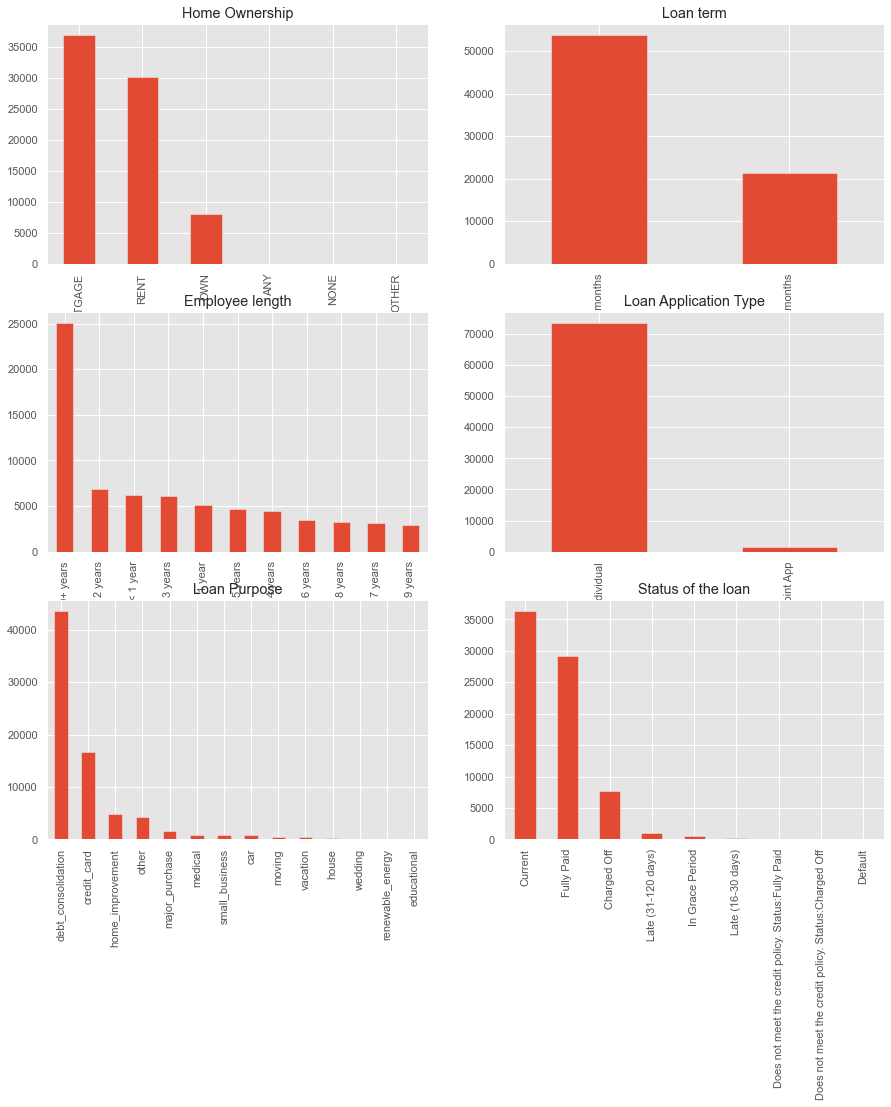

In [15]:
plt.figure(1)
plt.subplot(321) # bar plot with the number of loans for each category of home ownership
loan_data.home_ownership.value_counts().plot.bar(figsize=(20,15), title= 'Home Ownership')

plt.subplot(322)
loan_data.term.value_counts().plot.bar(title= 'Loan term')

plt.subplot(323)
loan_data.emp_length.value_counts().plot.bar(title= 'Employee length')


plt.subplot(324)
loan_data.application_type.value_counts().plot.bar(figsize=(15,15),title= 'Loan Application Type')

plt.subplot(325) # bar plot with the number of borrowers within each category of loan purpose
loan_data.purpose.value_counts().plot.bar(title= 'Loan Purpose')

plt.subplot(326)
loan_data.loan_status.value_counts().plot.bar(title= 'Status of the loan')

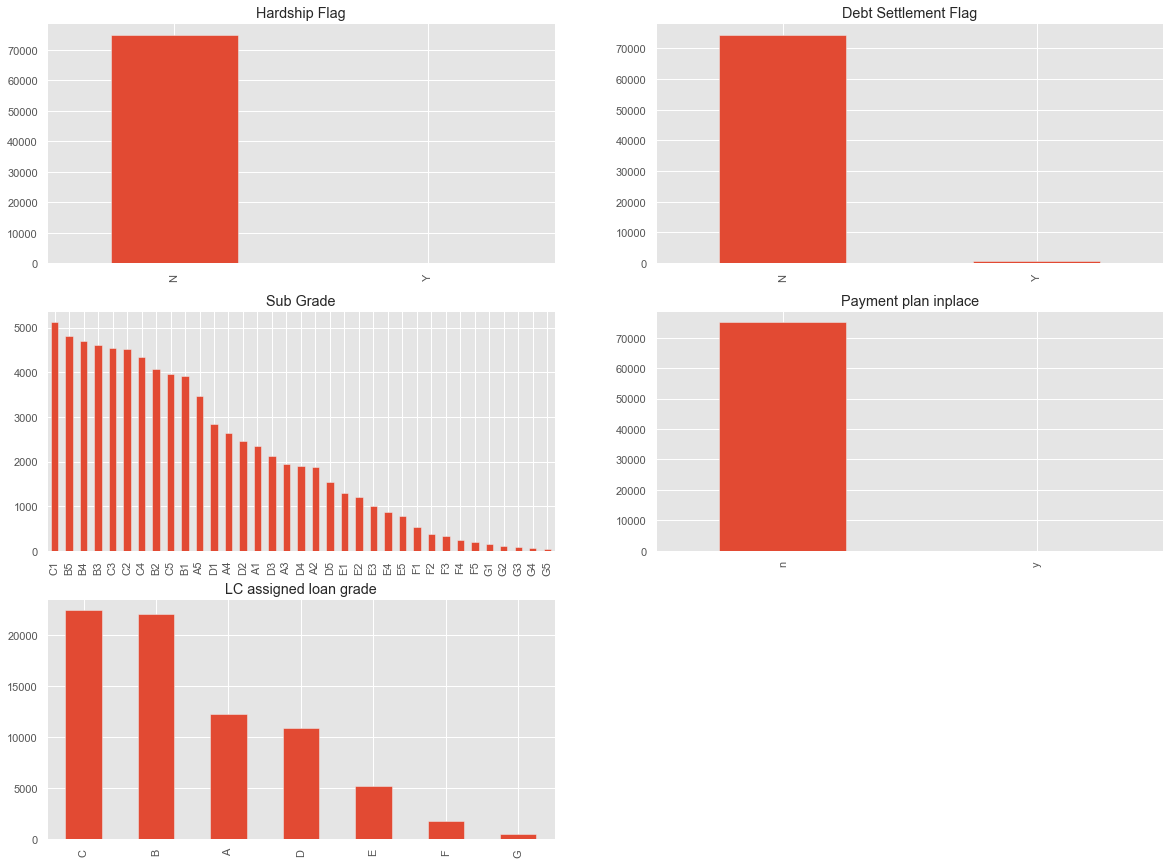

In [16]:
plt.figure(1)
plt.subplot(321)
loan_data.hardship_flag.value_counts().plot.bar(title= 'Hardship Flag')

plt.subplot(322)
loan_data.debt_settlement_flag.value_counts().plot.bar(title= 'Debt Settlement Flag')

plt.subplot(323) # bar plot with the number of loans for each category of loan subgrade
loan_data.sub_grade.value_counts().plot.bar(figsize=(20,15), title= 'Sub Grade')

plt.subplot(324)
loan_data.pymnt_plan.value_counts().plot.bar(title= 'Payment plan inplace')

plt.subplot(325)
loan_data.grade.value_counts().plot.bar(title= 'LC assigned loan grade')

plt.show()

### Numeric Variables

In [17]:
## Numeric Features
num_vars = ds.structdata.get_num_feats(loan_data)
print(num_vars)

['id', 'loan_amnt', 'funded_amnt', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'last_fico_range_high', 'last_fico_range_low', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'int_rate']


In [18]:
## Numeric Features
cat_vars = ds.structdata.get_cat_feats(loan_data)
print(cat_vars)

['term', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type', 'hardship_flag', 'debt_settlement_flag', 'grade']


**To derive good insight from the numerical variables its better to divide these variables into several groups and explore them in chunks**

### Variable Groupings
To effectively explore the data, variables will be grouped into a number of categories according to their function. The groups are as follow:
* Grade related variables
* Scoring variables
* customer related variables
* delinquency related variables
* inquiry related variables
* accounts related variables
* balances related
* dates

In [123]:
# Make a copy of loan data
formatted_df = loan_data.copy()
# Change data type of ID variable to string
formatted_df['id'] = formatted_df['id'].astype(str)
# Group variables into various categories
inquiry_rel = loan_data[['id', 'inq_last_6mths', 'mths_since_recent_inq']]
           
acct_rel = loan_data[['id', 'open_acc', 'total_acc', 'acc_open_past_24mths', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 
            'mo_sin_rcnt_rev_tl_op', 'mort_acc', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'num_actv_bc_tl', 
            'num_actv_rev_tl', 'num_sats', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl','num_rev_accts', 
            'num_rev_tl_bal_gt_0', 'num_tl_op_past_12m']]

bal_rel = loan_data[['id', 'tot_cur_bal', 'avg_cur_bal',  'total_bal_ex_mort', 
           'total_bc_limit', 'revol_util',  'total_rev_hi_lim', 'bc_util', 'bc_open_to_buy']]


grade_rel = loan_data[['id', 'loan_amnt', 'term', 'grade', 'sub_grade', 'int_rate', 'installment', 'purpose', 'application_type', 
                 'initial_list_status', 'funded_amnt']]

scoring = loan_data[['id', 'fico_range_low', 'fico_range_high', 'tot_hi_cred_lim', 'total_il_high_credit_limit', 'pct_tl_nvr_dlq', 
           'percent_bc_gt_75', 'pub_rec_bankruptcies', 'pub_rec','last_fico_range_high', 'last_fico_range_low',
           'hardship_flag', 'debt_settlement_flag','tax_liens', 'loan_status']]

customer_rel = loan_data[['id', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'dti',  'tax_liens']]

delinq_rel = loan_data[['id', 'delinq_2yrs', 'mths_since_last_delinq', 'acc_now_delinq', 
            'tot_coll_amt', 'delinq_amnt','num_accts_ever_120_pd', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m']]

dates = loan_data[['id','issue_d', 'earliest_cr_line']]

### Descriptive Statistics, Feature Extraction and Exploration of each Group

#### Customer Related Variables

In [59]:
# Basic Descriptive statistics
ds.structdata.describe(customer_rel)

First five data points


,id,emp_length,home_ownership,annual_inc,verification_status,dti,tax_liens
0,48654285,10+ years,MORTGAGE,106000.0,Source Verified,18.99,0.0
1,5626429,10+ years,RENT,112000.0,Not Verified,10.95,0.0
2,14660646,9 years,MORTGAGE,76791.0,Not Verified,6.27,0.0
3,6607685,2 years,RENT,125000.0,Source Verified,7.69,0.0
4,60537487,4 years,MORTGAGE,240000.0,Source Verified,24.68,0.0




Random five data points


,id,emp_length,home_ownership,annual_inc,verification_status,dti,tax_liens
40310,12907549,4 years,RENT,80000.0,Source Verified,11.18,0.0
10610,63988022,10+ years,RENT,40000.0,Verified,21.60,0.0
74954,32439742,< 1 year,RENT,41600.0,Verified,9.95,0.0
64015,98838064,3 years,RENT,22000.0,Source Verified,6.71,0.0
33701,72173232,9 years,MORTGAGE,89000.0,Verified,25.49,0.0




Last five data points


,id,emp_length,home_ownership,annual_inc,verification_status,dti,tax_liens
74995,108749624,10+ years,RENT,67000.0,Source Verified,25.83,0.0
74996,55278189,10+ years,MORTGAGE,147000.0,Source Verified,10.37,1.0
74997,119294633,NaN,MORTGAGE,70000.0,Not Verified,28.35,0.0
74998,40950548,1 year,RENT,120000.0,Not Verified,4.16,0.0
74999,114132327,6 years,RENT,40000.0,Source Verified,20.73,0.0




Shape of  data set: (75000, 7)


Size of  data set: 525000


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
id,object
emp_length,object
home_ownership,object
annual_inc,float64
verification_status,object
dti,float64
tax_liens,float64




Numerical Features in Data set
['annual_inc', 'dti', 'tax_liens']


Categorical Features in Data set


['id', 'emp_length', 'home_ownership', 'verification_status']



Statistical Description of Columns


,annual_inc,dti,tax_liens
count,7.500000e+04,74983.000000,74997.000000
mean,7.789558e+04,18.353518,0.058602
std,6.826285e+04,10.494987,0.387402
min,0.000000e+00,0.000000,0.000000
25%,4.700000e+04,11.960000,0.000000
50%,6.500000e+04,17.690000,0.000000
75%,9.240200e+04,24.110000,0.000000
max,8.900000e+06,999.000000,18.000000




Description of Categorical Features


,count,unique,top,freq
id,75000,75000,3703903,1
emp_length,71118,11,10+ years,25034
home_ownership,75000,6,MORTGAGE,36784
verification_status,75000,3,Source Verified,37055




Unique class Count of Categorical features


,Feature,Unique Count
0,id,75000
1,emp_length,12
2,home_ownership,6
3,verification_status,3




Missing Values in Data


,features,missing_counts,missing_percent
0,id,0,0.0
1,emp_length,3882,5.2
2,home_ownership,0,0.0
3,annual_inc,0,0.0
4,verification_status,0,0.0
5,dti,17,0.0
6,tax_liens,3,0.0


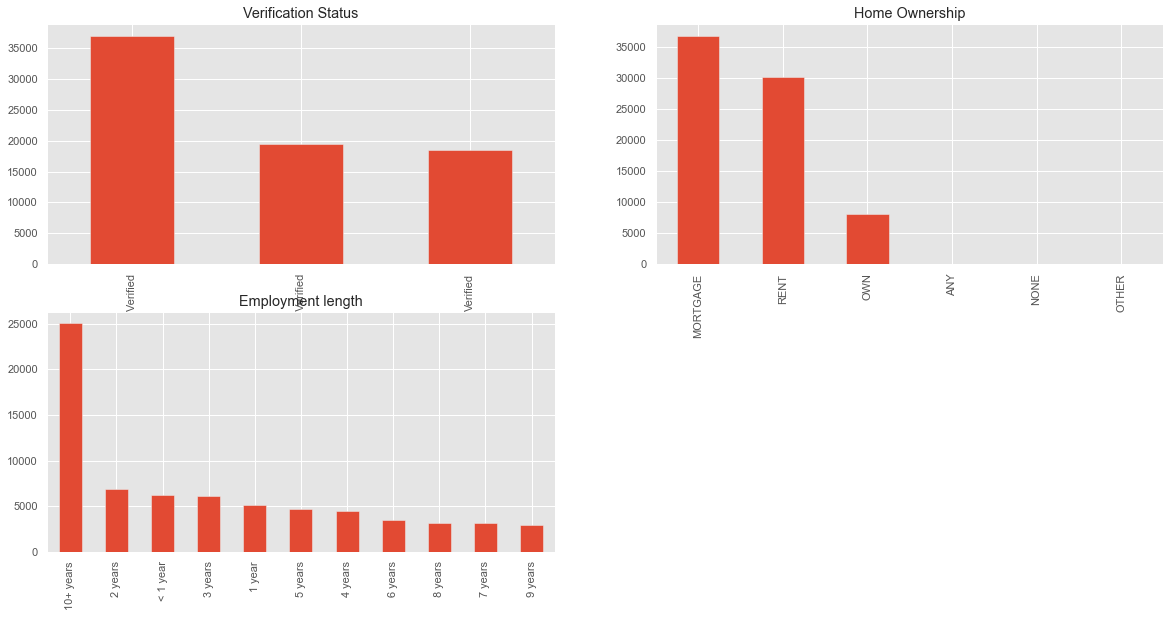

In [60]:
# Classes in categorical variables
plt.figure(1)
plt.subplot(321)
customer_rel.verification_status.value_counts().plot.bar(title= 'Verification Status')

plt.subplot(322)
customer_rel.home_ownership.value_counts().plot.bar(title= 'Home Ownership')

plt.subplot(323)
customer_rel.emp_length.value_counts().plot.bar(figsize=(20,15), title= 'Employment length')

plt.show()

In [61]:
# Various categories of employment length
customer_rel.emp_length.value_counts()

10+ years    25034
2 years       6856
< 1 year      6253
3 years       6062
1 year        5086
5 years       4721
4 years       4443
6 years       3447
8 years       3210
7 years       3109
9 years       2897
Name: emp_length, dtype: int64

In [62]:
# Format classes of employment length variable
emp_len_map = {
    '< 1 year': '0',
    '1 year': '1',
    '2 years': '2',
    '3 years': '3',
    '4 years': '4',
    '5 years': '5',
    '6 years': '6',
    '7 years': '7',
    '8 years': '8',
    '9 years': '9',
    '10+ years': '10',
}

formatted_df.emp_length = formatted_df.emp_length.map(emp_len_map)


In [63]:
# Various categories of home ownership
customer_rel.home_ownership.value_counts()

MORTGAGE    36784
RENT        30138
OWN          8049
ANY            22
NONE            6
OTHER           1
Name: home_ownership, dtype: int64

**Classes like OWN, ANY and OTHER have little entries. To reduce the cardinality of the data these classes will be merged to the RENT class.** 

In [64]:
# Format classes of home ownership variable
home_own_map = {
    'MORTGAGE': 'MORTGAGE',
    'OWN': 'OWN',
    'RENT': 'RENT',
    'ANY': 'RENT',
    'NONE': 'RENT',
    'OTHER': 'RENT'
}
formatted_df.home_ownership = formatted_df.home_ownership.map(home_own_map)

In [65]:
customer_rel.verification_status.value_counts()

Source Verified    37055
Not Verified       19513
Verified           18432
Name: verification_status, dtype: int64

In [67]:
# Description of numerical variables
customer_rel.describe()

,annual_inc,dti,tax_liens
count,7.500000e+04,74983.000000,74997.000000
mean,7.789558e+04,18.353518,0.058602
std,6.826285e+04,10.494987,0.387402
min,0.000000e+00,0.000000,0.000000
25%,4.700000e+04,11.960000,0.000000
50%,6.500000e+04,17.690000,0.000000
75%,9.240200e+04,24.110000,0.000000
max,8.900000e+06,999.000000,18.000000


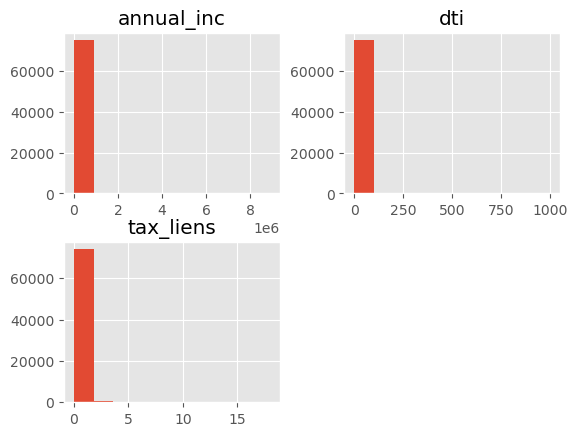

In [127]:
# Distribution of numeric variables
customer_rel.hist()
plt.show()

#### Loan Grade Related Variables

In [135]:
# Overview
ds.structdata.describe(grade_rel)

First five data points


,id,loan_amnt,term,grade,sub_grade,int_rate,installment,purpose,application_type,initial_list_status,funded_amnt
0,48654285,25000.0,36 months,C,C1,12.29,833.83,debt_consolidation,Individual,w,25000.0
1,5626429,3125.0,36 months,C,C5,17.27,111.84,debt_consolidation,Individual,f,3125.0
2,14660646,8025.0,60 months,D,D1,16.59,197.68,debt_consolidation,Individual,w,8025.0
3,6607685,5000.0,36 months,C,C5,16.78,177.72,debt_consolidation,Individual,f,5000.0
4,60537487,35000.0,60 months,B,B5,11.53,770.27,credit_card,Individual,f,35000.0




Random five data points


,id,loan_amnt,term,grade,sub_grade,int_rate,installment,purpose,application_type,initial_list_status,funded_amnt
61338,40355047,5975.0,36 months,C,C4,13.99,204.19,debt_consolidation,Individual,f,5975.0
15749,58260228,10000.0,36 months,C,C5,14.65,344.95,credit_card,Individual,w,10000.0
60284,76548423,5600.0,36 months,C,C1,11.99,185.98,credit_card,Individual,w,5600.0
58623,87987193,14000.0,60 months,D,D4,19.99,370.84,credit_card,Individual,w,14000.0
35418,19196715,25000.0,60 months,C,C1,12.99,568.70,debt_consolidation,Individual,w,25000.0




Last five data points


,id,loan_amnt,term,grade,sub_grade,int_rate,installment,purpose,application_type,initial_list_status,funded_amnt
74995,108749624,6400.0,36 months,D,D5,21.45,242.61,other,Individual,w,6400.0
74996,55278189,25000.0,36 months,C,C1,12.29,833.83,other,Individual,f,25000.0
74997,119294633,19200.0,60 months,C,C3,14.08,447.55,debt_consolidation,Joint App,w,19200.0
74998,40950548,11000.0,36 months,B,B5,11.53,362.90,debt_consolidation,Individual,w,11000.0
74999,114132327,10000.0,36 months,B,B2,9.93,322.35,credit_card,Individual,w,10000.0




Shape of  data set: (75000, 11)


Size of  data set: 825000


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
id,object
loan_amnt,float64
term,object
grade,object
sub_grade,object
int_rate,float64
installment,float64
purpose,object
application_type,object
initial_list_status,object




Numerical Features in Data set
['loan_amnt', 'int_rate', 'installment', 'funded_amnt']


Categorical Features in Data set


['id',
 'term',
 'grade',
 'sub_grade',
 'purpose',
 'application_type',
 'initial_list_status']



Statistical Description of Columns


,loan_amnt,int_rate,installment,funded_amnt
count,75000.000000,75000.000000,75000.000000,75000.000000
mean,14757.664667,13.219395,439.763792,14751.164333
std,8775.723727,4.680765,258.140255,8773.297316
min,500.000000,5.320000,15.670000,500.000000
25%,8000.000000,9.910000,253.180000,8000.000000
50%,12675.000000,12.740000,377.410000,12625.000000
75%,20000.000000,15.960000,578.680000,20000.000000
max,40000.000000,30.990000,1587.230000,40000.000000




Description of Categorical Features


,count,unique,top,freq
id,75000,75000,3703903,1
term,75000,2,36 months,53680
grade,75000,7,C,22465
sub_grade,75000,35,C1,5113
purpose,75000,14,debt_consolidation,43586
application_type,75000,2,Individual,73464
initial_list_status,75000,2,w,46502




Unique class Count of Categorical features


,Feature,Unique Count
0,id,75000
1,term,2
2,grade,7
3,sub_grade,35
4,purpose,14
5,application_type,2
6,initial_list_status,2




Missing Values in Data


,features,missing_counts,missing_percent
0,id,0,0.0
1,loan_amnt,0,0.0
2,term,0,0.0
3,grade,0,0.0
4,sub_grade,0,0.0
5,int_rate,0,0.0
6,installment,0,0.0
7,purpose,0,0.0
8,application_type,0,0.0
9,initial_list_status,0,0.0


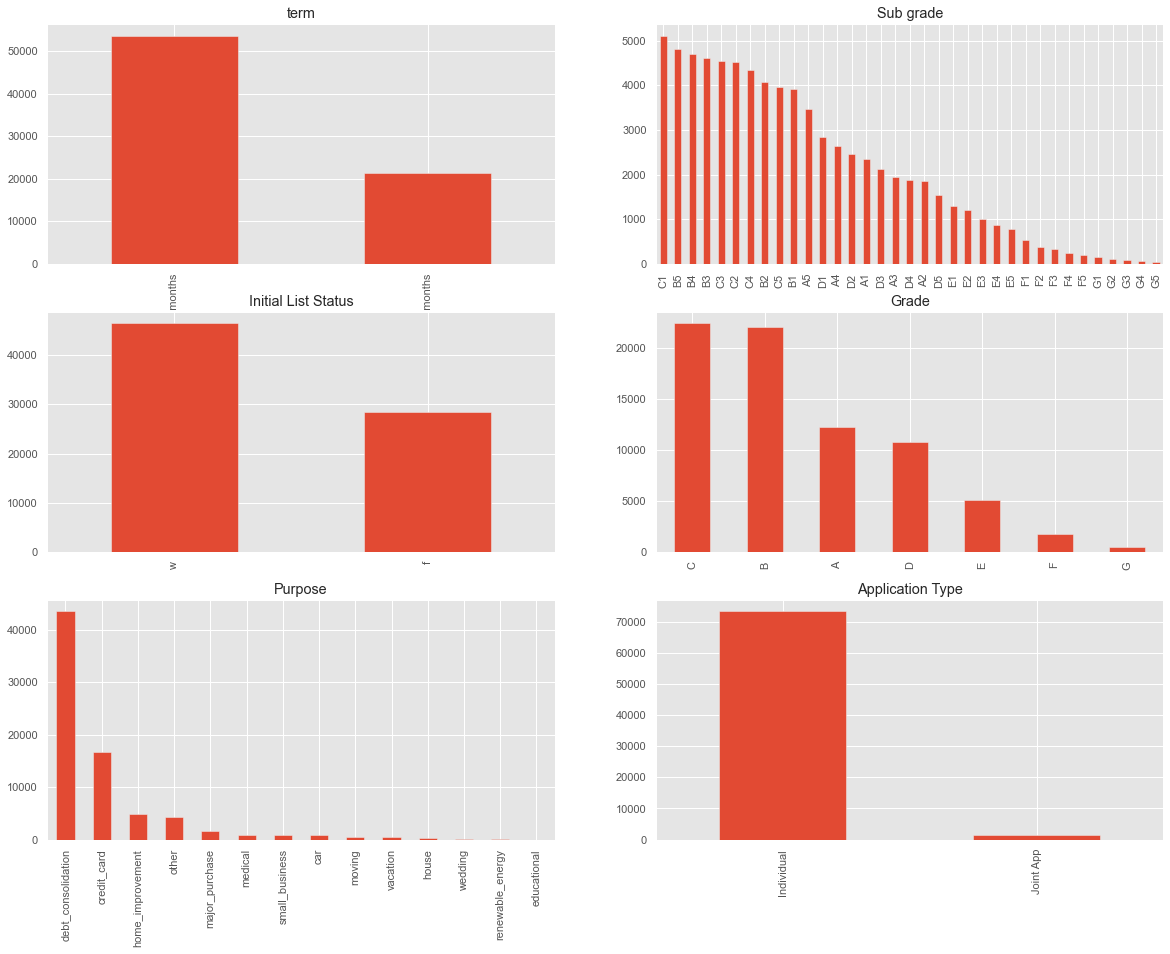

In [69]:
# Classes in categorical variables
plt.figure(1)
plt.subplot(321)
grade_rel.term.value_counts().plot.bar(title= 'term')

plt.subplot(322)
grade_rel.sub_grade.value_counts().plot.bar(title= 'Sub grade')

plt.subplot(323)
grade_rel.initial_list_status.value_counts().plot.bar(title= 'Initial List Status')

plt.subplot(324)
grade_rel.grade.value_counts().plot.bar(figsize=(20,15), title= 'Grade')

plt.subplot(325)
grade_rel.purpose.value_counts().plot.bar(figsize=(20,15), title= 'Purpose')

plt.subplot(326)
grade_rel.application_type.value_counts().plot.bar(title= 'Application Type')

plt.show()

In [70]:
# Various categories of term
grade_rel.term.value_counts()

 36 months    53680
 60 months    21320
Name: term, dtype: int64

In [71]:
# Format classes of term variable
term_map = {
    '36 months': '36',
    '60 months': '60',
}

formatted_df.term = formatted_df.term.map(term_map)

In [72]:
# Various categories of purpose
grade_rel.purpose.value_counts()

debt_consolidation    43586
credit_card           16735
home_improvement       4877
other                  4209
major_purchase         1623
medical                 860
small_business          819
car                     783
moving                  513
vacation                511
house                   338
wedding                  92
renewable_energy         45
educational               9
Name: purpose, dtype: int64

In [73]:
# Format classes of purpose variable
purpose_map = {
    "debt_consolidation" :"debt_consolidation",
    "credit_card"        :"credit_card",
    "home_improvement"   :"wellbeing",
    "other"              :"other",
    "major_purchase"     :"major_purchase",
    "medical"            :"Wellbeing",
    "small_business"     :"other",
    "car"                :"other",
    "moving"             :"Wellbeing",
    "vacation"           :"wellbeing",
    "house"              :"wellbeing",
    "wedding"           :"wellbeing",
    "renewable_energy"   :"other",
    "educational"        :"other",
}

formatted_df.purpose = formatted_df.purpose.map(purpose_map)

In [74]:
# Various categories of initial listing
grade_rel.initial_list_status.value_counts()

w    46502
f    28498
Name: initial_list_status, dtype: int64

In [75]:
# Format classes of initial listing variable
listing_map = {
    'w': 'whole',
    'f': 'fraction',
}

formatted_df.initial_list_status = formatted_df.initial_list_status.map(listing_map)

In [77]:
# Description of numerical variables
grade_rel.describe()

,loan_amnt,int_rate,installment,int_rate,funded_amnt
count,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000
mean,14757.664667,13.219395,439.763792,13.219395,14751.164333
std,8775.723727,4.680765,258.140255,4.680765,8773.297316
min,500.000000,5.320000,15.670000,5.320000,500.000000
25%,8000.000000,9.910000,253.180000,9.910000,8000.000000
50%,12675.000000,12.740000,377.410000,12.740000,12625.000000
75%,20000.000000,15.960000,578.680000,15.960000,20000.000000
max,40000.000000,30.990000,1587.230000,30.990000,40000.000000


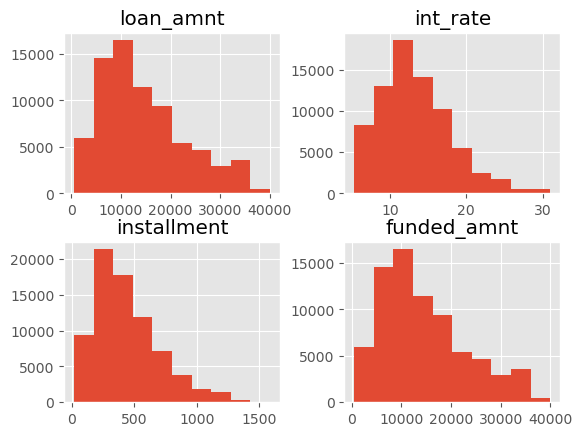

In [124]:
# Distribution of numeric variables
grade_rel.hist()
plt.show()

#### Account Related Variables

In [78]:
# Overview
ds.structdata.describe(acct_rel)

First five data points


,id,open_acc,total_acc,acc_open_past_24mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,mo_sin_rcnt_tl,mths_since_recent_bc,num_actv_bc_tl,num_actv_rev_tl,num_sats,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_op_past_12m
0,48654285,31.0,45.0,12.0,243.0,174.0,6.0,3.0,6.0,6.0,7.0,13.0,31.0,9.0,12.0,20.0,17.0,21.0,13.0,3.0
1,5626429,6.0,16.0,4.0,81.0,157.0,13.0,2.0,8.0,13.0,1.0,4.0,6.0,1.0,3.0,6.0,5.0,8.0,4.0,1.0
2,14660646,6.0,20.0,0.0,170.0,217.0,25.0,6.0,25.0,77.0,2.0,3.0,6.0,2.0,7.0,3.0,4.0,10.0,3.0,0.0
3,6607685,9.0,20.0,4.0,103.0,115.0,5.0,0.0,5.0,5.0,7.0,7.0,9.0,7.0,12.0,8.0,7.0,12.0,7.0,2.0
4,60537487,25.0,38.0,5.0,112.0,419.0,22.0,4.0,7.0,52.0,13.0,18.0,25.0,15.0,15.0,10.0,18.0,20.0,15.0,2.0




Random five data points


,id,open_acc,total_acc,acc_open_past_24mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,mo_sin_rcnt_tl,mths_since_recent_bc,num_actv_bc_tl,num_actv_rev_tl,num_sats,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_op_past_12m
50249,5628523,9.0,18.0,2.0,134.0,121.0,22.0,4.0,11.0,74.0,1.0,2.0,9.0,2.0,5.0,4.0,6.0,10.0,2.0,1.0
63666,38658931,9.0,13.0,4.0,144.0,296.0,4.0,0.0,4.0,10.0,5.0,6.0,9.0,6.0,7.0,2.0,7.0,10.0,6.0,3.0
36628,65876072,11.0,26.0,3.0,121.0,524.0,19.0,5.0,2.0,19.0,4.0,4.0,10.0,4.0,6.0,10.0,7.0,11.0,4.0,1.0
29561,96044702,26.0,61.0,6.0,142.0,195.0,7.0,1.0,7.0,7.0,7.0,9.0,26.0,14.0,25.0,19.0,21.0,41.0,9.0,1.0
16082,95160451,14.0,24.0,3.0,154.0,359.0,1.0,0.0,1.0,25.0,4.0,4.0,14.0,7.0,8.0,5.0,12.0,19.0,4.0,1.0




Last five data points


,id,open_acc,total_acc,acc_open_past_24mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,mo_sin_rcnt_tl,mths_since_recent_bc,num_actv_bc_tl,num_actv_rev_tl,num_sats,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_op_past_12m
74995,108749624,18.0,51.0,8.0,54.0,170.0,2.0,0.0,2.0,2.0,6.0,8.0,18.0,7.0,13.0,15.0,15.0,36.0,10.0,5.0
74996,55278189,4.0,13.0,0.0,190.0,242.0,98.0,5.0,35.0,119.0,1.0,1.0,4.0,1.0,2.0,3.0,1.0,5.0,1.0,0.0
74997,119294633,10.0,30.0,6.0,114.0,166.0,0.0,6.0,0.0,1.0,3.0,6.0,10.0,4.0,12.0,6.0,7.0,18.0,6.0,3.0
74998,40950548,9.0,12.0,5.0,42.0,116.0,10.0,0.0,5.0,10.0,4.0,5.0,9.0,6.0,6.0,3.0,8.0,9.0,5.0,2.0
74999,114132327,14.0,20.0,3.0,57.0,70.0,14.0,0.0,5.0,14.0,1.0,2.0,14.0,7.0,7.0,4.0,13.0,16.0,2.0,1.0




Shape of  data set: (75000, 20)


Size of  data set: 1500000


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
id,object
open_acc,float64
total_acc,float64
acc_open_past_24mths,float64
mo_sin_old_il_acct,float64
mo_sin_old_rev_tl_op,float64
mo_sin_rcnt_rev_tl_op,float64
mort_acc,float64
mo_sin_rcnt_tl,float64
mths_since_recent_bc,float64




Numerical Features in Data set
['open_acc', 'total_acc', 'acc_open_past_24mths', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mort_acc', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_sats', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_tl_op_past_12m']


Categorical Features in Data set


['id']



Statistical Description of Columns


,open_acc,total_acc,acc_open_past_24mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,mo_sin_rcnt_tl,mths_since_recent_bc,num_actv_bc_tl,num_actv_rev_tl,num_sats,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_tl_op_past_12m
count,75000.000000,75000.000000,72868.000000,69913.000000,72013.000000,72013.000000,72868.000000,72013.000000,72141.000000,72013.000000,72013.000000,72470.000000,72470.00000,72013.000000,72013.000000,72013.000000,72013.000000,72013.000000,72013.000000
mean,11.624187,24.659507,4.545672,126.641469,182.450169,13.548123,1.627683,8.119826,24.607657,3.687279,5.707706,11.657638,4.70948,7.913530,8.524391,8.242526,14.345174,5.661658,2.088040
std,5.506166,11.907902,3.116806,52.478053,94.707327,16.954811,1.961166,8.959273,31.664283,2.265434,3.322854,5.511841,2.92549,4.707067,7.371002,4.545800,8.021543,3.246166,1.784803
min,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,8.000000,16.000000,2.000000,99.000000,118.000000,4.000000,0.000000,3.000000,6.000000,2.000000,3.000000,8.000000,3.00000,5.000000,4.000000,5.000000,9.000000,3.000000,1.000000
50%,11.000000,23.000000,4.000000,130.000000,165.000000,8.000000,1.000000,6.000000,14.000000,3.000000,5.000000,11.000000,4.00000,7.000000,7.000000,7.000000,13.000000,5.000000,2.000000
75%,14.000000,31.000000,6.000000,153.000000,232.000000,16.000000,3.000000,10.000000,29.000000,5.000000,7.000000,14.000000,6.00000,10.000000,11.000000,10.000000,18.000000,7.000000,3.000000
max,76.000000,141.000000,37.000000,724.000000,817.000000,270.000000,34.000000,211.000000,610.000000,28.000000,47.000000,76.000000,41.00000,63.000000,88.000000,71.000000,127.000000,47.000000,25.000000




Description of Categorical Features


,count,unique,top,freq
id,75000,75000,3703903,1




Unique class Count of Categorical features


,Feature,Unique Count
0,id,75000




Missing Values in Data


,features,missing_counts,missing_percent
0,id,0,0.0
1,open_acc,0,0.0
2,total_acc,0,0.0
3,acc_open_past_24mths,2132,2.8
4,mo_sin_old_il_acct,5087,6.8
5,mo_sin_old_rev_tl_op,2987,4.0
6,mo_sin_rcnt_rev_tl_op,2987,4.0
7,mort_acc,2132,2.8
8,mo_sin_rcnt_tl,2987,4.0
9,mths_since_recent_bc,2859,3.8


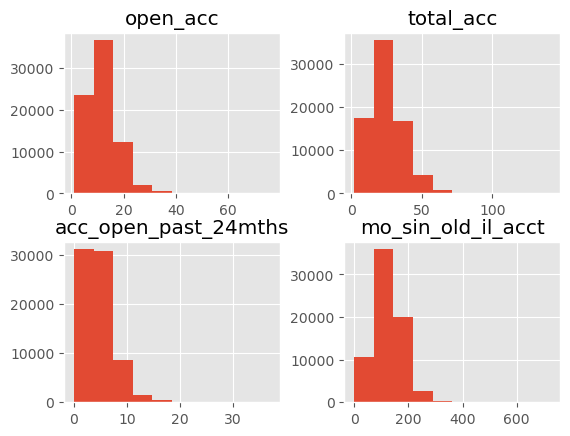

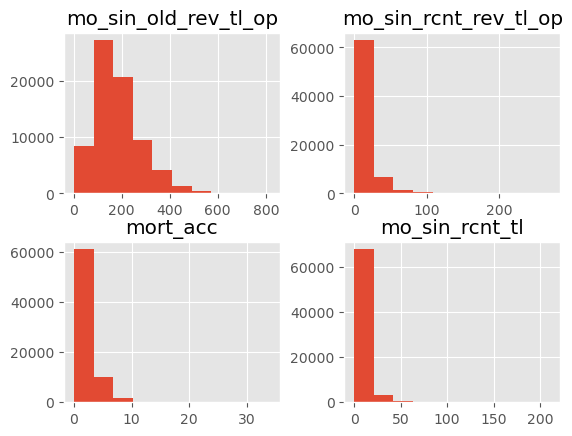

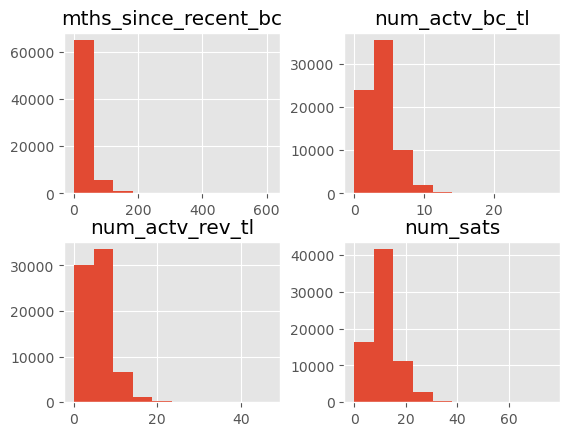

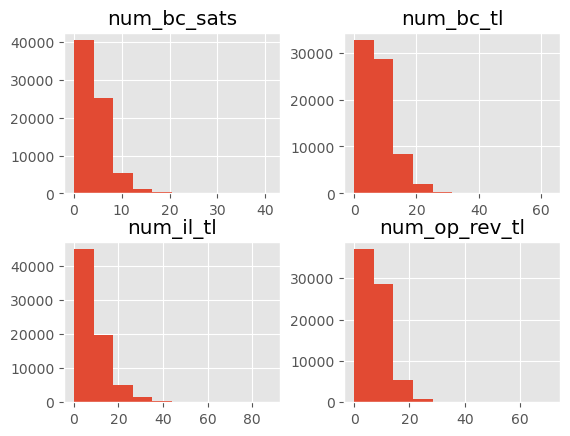

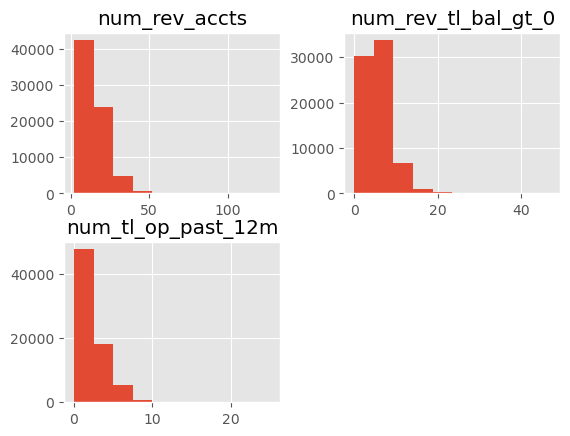

In [142]:
# Distribution of numeric variables
A = ['open_acc','total_acc','acc_open_past_24mths','mo_sin_old_il_acct']
B = ['mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mort_acc','mo_sin_rcnt_tl']
C = ['mths_since_recent_bc','num_actv_bc_tl','num_actv_rev_tl','num_sats']
D = ['num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl']
E = ['num_rev_accts','num_rev_tl_bal_gt_0','num_tl_op_past_12m']
acct_rel1 = acct_rel[A]
acct_rel2 = acct_rel[B]
acct_rel3 = acct_rel[C]
acct_rel4 = acct_rel[D]
acct_rel5 = acct_rel[E]

acct_rel1.hist()
acct_rel2.hist()
acct_rel3.hist()
acct_rel4.hist()
acct_rel5.hist()
plt.show()

#### Balance Related Variables

In [79]:
# Overview
ds.structdata.describe(bal_rel)

First five data points


,id,tot_cur_bal,avg_cur_bal,total_bal_ex_mort,total_bc_limit,revol_util,total_rev_hi_lim,bc_util,bc_open_to_buy
0,48654285,385387.0,13289.0,78492.0,9300.0,63.2,22400.0,85.7,1328.0
1,5626429,27966.0,5593.0,27966.0,300.0,73.2,7400.0,29.7,211.0
2,14660646,270808.0,45135.0,13134.0,5500.0,60.4,10200.0,98.3,94.0
3,6607685,26577.0,2953.0,26577.0,15700.0,96.7,15700.0,96.7,519.0
4,60537487,775839.0,31033.0,210953.0,73900.0,85.0,92300.0,90.0,5685.0




Random five data points


,id,tot_cur_bal,avg_cur_bal,total_bal_ex_mort,total_bc_limit,revol_util,total_rev_hi_lim,bc_util,bc_open_to_buy
41414,57216457,339468.0,24248.0,339468.0,26200.0,54.8,37600.0,70.5,7719.0
68668,102426602,139824.0,9987.0,32115.0,86700.0,4.8,88300.0,4.9,82420.0
59996,50213338,26049.0,2605.0,26049.0,25700.0,19.3,27200.0,20.2,20511.0
7695,1409903,NaN,NaN,21882.0,500.0,0.0,NaN,0.0,500.0
33477,643558,NaN,NaN,NaN,NaN,69.5,NaN,NaN,NaN




Last five data points


,id,tot_cur_bal,avg_cur_bal,total_bal_ex_mort,total_bc_limit,revol_util,total_rev_hi_lim,bc_util,bc_open_to_buy
74995,108749624,65136.0,3619.0,65136.0,23700.0,65.7,47000.0,73.1,6379.0
74996,55278189,268508.0,67127.0,37752.0,19500.0,87.7,19500.0,87.7,2401.0
74997,119294633,172914.0,17291.0,80467.0,17400.0,77.4,32000.0,84.8,2649.0
74998,40950548,11446.0,1431.0,11446.0,27000.0,30.4,27400.0,30.4,18780.0
74999,114132327,43819.0,4382.0,43819.0,19500.0,15.4,25500.0,7.3,18068.0




Shape of  data set: (75000, 9)


Size of  data set: 675000


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
id,object
tot_cur_bal,float64
avg_cur_bal,float64
total_bal_ex_mort,float64
total_bc_limit,float64
revol_util,float64
total_rev_hi_lim,float64
bc_util,float64
bc_open_to_buy,float64




Numerical Features in Data set
['tot_cur_bal', 'avg_cur_bal', 'total_bal_ex_mort', 'total_bc_limit', 'revol_util', 'total_rev_hi_lim', 'bc_util', 'bc_open_to_buy']


Categorical Features in Data set


['id']



Statistical Description of Columns


,tot_cur_bal,avg_cur_bal,total_bal_ex_mort,total_bc_limit,revol_util,total_rev_hi_lim,bc_util,bc_open_to_buy
count,7.201300e+04,72013.000000,7.286800e+04,72868.000000,74948.000000,7.201300e+04,72045.000000,72092.000000
mean,1.408816e+05,13405.791274,5.063086e+04,21632.648707,52.838231,3.270135e+04,61.095282,9810.349387
std,1.573808e+05,16054.726842,4.850279e+04,21246.788488,24.017075,3.371610e+04,27.670098,14605.551756
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,2.970100e+04,3132.000000,2.140100e+04,7800.000000,34.900000,1.400000e+04,40.200000,1436.000000
50%,7.902400e+04,7284.000000,3.780050e+04,15200.000000,53.300000,2.410000e+04,64.500000,4579.500000
75%,2.092110e+05,18574.000000,6.377700e+04,28100.000000,71.400000,4.070000e+04,85.300000,12001.250000
max,3.128834e+06,298619.000000,1.151161e+06,414100.000000,150.700000,1.652700e+06,243.800000,262697.000000




Description of Categorical Features


,count,unique,top,freq
id,75000,75000,3703903,1




Unique class Count of Categorical features


,Feature,Unique Count
0,id,75000




Missing Values in Data


,features,missing_counts,missing_percent
0,id,0,0.0
1,tot_cur_bal,2987,4.0
2,avg_cur_bal,2987,4.0
3,total_bal_ex_mort,2132,2.8
4,total_bc_limit,2132,2.8
5,revol_util,52,0.1
6,total_rev_hi_lim,2987,4.0
7,bc_util,2955,3.9
8,bc_open_to_buy,2908,3.9


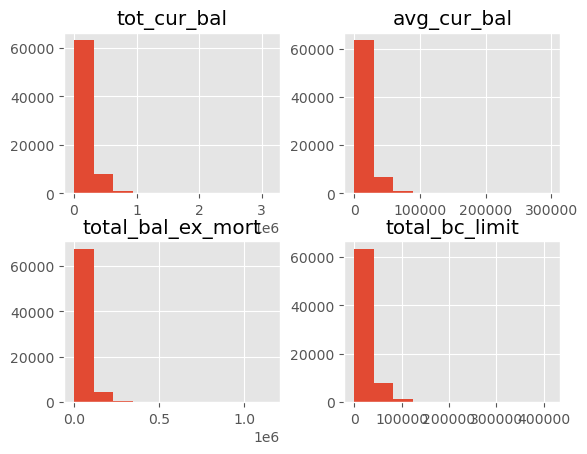

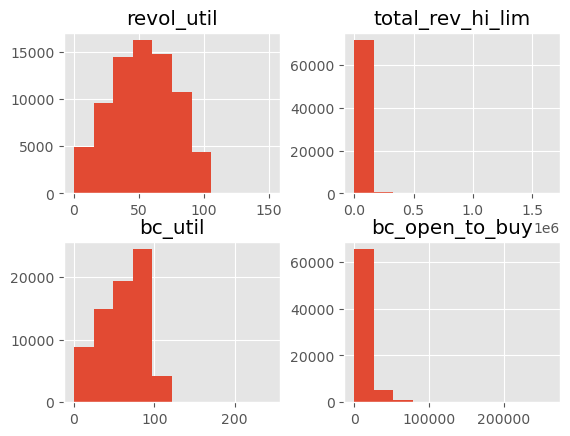

In [145]:
# Distribution of numeric variables
A = ['tot_cur_bal','avg_cur_bal','total_bal_ex_mort','total_bc_limit']
B = ['revol_util','total_rev_hi_lim','bc_util','bc_open_to_buy']

bal_rel1 = bal_rel[A]
bal_rel2 = bal_rel[B]

bal_rel1.hist()
bal_rel2.hist()
plt.show()

#### Scoring Related Variables

In [80]:
# Overview
ds.structdata.describe(scoring)

First five data points


,id,fico_range_low,fico_range_high,tot_hi_cred_lim,total_il_high_credit_limit,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,pub_rec,last_fico_range_high,last_fico_range_low,hardship_flag,debt_settlement_flag,tax_liens,loan_status
0,48654285,665.0,669.0,413442.0,69882.0,97.8,57.1,0.0,0.0,734.0,730.0,N,N,0.0,Fully Paid
1,5626429,680.0,684.0,59695.0,52295.0,62.0,0.0,0.0,0.0,734.0,730.0,N,N,0.0,Fully Paid
2,14660646,675.0,679.0,308200.0,10000.0,80.0,100.0,0.0,0.0,704.0,700.0,N,N,0.0,Fully Paid
3,6607685,665.0,669.0,38098.0,22398.0,95.0,100.0,0.0,0.0,724.0,720.0,N,N,0.0,Fully Paid
4,60537487,680.0,684.0,820114.0,80506.0,100.0,76.9,0.0,0.0,699.0,695.0,N,N,0.0,Current




Random five data points


,id,fico_range_low,fico_range_high,tot_hi_cred_lim,total_il_high_credit_limit,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,pub_rec,last_fico_range_high,last_fico_range_low,hardship_flag,debt_settlement_flag,tax_liens,loan_status
18073,46978424,680.0,684.0,27728.0,1728.0,94.1,25.0,0.0,0.0,669.0,665.0,N,N,0.0,Fully Paid
56950,52331243,720.0,724.0,488230.0,48936.0,100.0,60.0,0.0,0.0,749.0,745.0,N,N,0.0,Current
621,115380477,660.0,664.0,542298.0,109098.0,100.0,20.0,0.0,0.0,659.0,655.0,N,N,0.0,Current
53073,72565376,755.0,759.0,214684.0,87912.0,100.0,100.0,0.0,0.0,649.0,645.0,N,N,0.0,Fully Paid
43200,94202606,720.0,724.0,89049.0,73249.0,100.0,100.0,0.0,0.0,734.0,730.0,N,N,0.0,Fully Paid




Last five data points


,id,fico_range_low,fico_range_high,tot_hi_cred_lim,total_il_high_credit_limit,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,pub_rec,last_fico_range_high,last_fico_range_low,hardship_flag,debt_settlement_flag,tax_liens,loan_status
74995,108749624,660.0,664.0,82642.0,35642.0,94.1,14.3,0.0,0.0,679.0,675.0,N,N,0.0,Current
74996,55278189,685.0,689.0,332175.0,37295.0,76.9,100.0,0.0,1.0,719.0,715.0,N,N,1.0,Current
74997,119294633,700.0,704.0,203847.0,65326.0,100.0,75.0,0.0,0.0,729.0,725.0,N,N,0.0,Current
74998,40950548,710.0,714.0,31354.0,3954.0,100.0,16.7,0.0,0.0,774.0,770.0,N,N,0.0,Fully Paid
74999,114132327,730.0,734.0,67121.0,41621.0,100.0,0.0,0.0,0.0,759.0,755.0,N,N,0.0,Current




Shape of  data set: (75000, 15)


Size of  data set: 1125000


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
id,object
fico_range_low,float64
fico_range_high,float64
tot_hi_cred_lim,float64
total_il_high_credit_limit,float64
pct_tl_nvr_dlq,float64
percent_bc_gt_75,float64
pub_rec_bankruptcies,float64
pub_rec,float64
last_fico_range_high,float64




Numerical Features in Data set
['fico_range_low', 'fico_range_high', 'tot_hi_cred_lim', 'total_il_high_credit_limit', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'pub_rec', 'last_fico_range_high', 'last_fico_range_low', 'tax_liens']


Categorical Features in Data set


['id', 'hardship_flag', 'debt_settlement_flag', 'loan_status']



Statistical Description of Columns


,fico_range_low,fico_range_high,tot_hi_cred_lim,total_il_high_credit_limit,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,pub_rec,last_fico_range_high,last_fico_range_low,tax_liens
count,75000.000000,75000.000000,7.201300e+04,7.201300e+04,72003.000000,72073.000000,74946.000000,75000.000000,75000.000000,75000.000000,74997.000000
mean,695.074733,699.074800,1.741829e+05,4.293570e+04,93.888569,46.154409,0.130374,0.219480,685.874320,675.255133,0.058602
std,30.883363,30.883688,1.791799e+05,4.389624e+04,9.063958,35.898235,0.377906,0.597422,68.801022,102.174950,0.387402
min,645.000000,649.000000,3.000000e+02,0.000000e+00,12.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,670.000000,674.000000,4.968300e+04,1.500000e+04,90.900000,14.300000,0.000000,0.000000,659.000000,655.000000,0.000000
50%,690.000000,694.000000,1.108920e+05,3.226200e+04,97.500000,50.000000,0.000000,0.000000,694.000000,690.000000,0.000000
75%,710.000000,714.000000,2.513240e+05,5.754700e+04,100.000000,75.000000,0.000000,0.000000,729.000000,725.000000,0.000000
max,845.000000,850.000000,9.999999e+06,1.285625e+06,100.000000,100.000000,8.000000,19.000000,850.000000,845.000000,18.000000




Description of Categorical Features


,count,unique,top,freq
id,75000,75000,3703903,1
hardship_flag,75000,2,N,74959
debt_settlement_flag,75000,2,N,74415
loan_status,75000,9,Current,36323




Unique class Count of Categorical features


,Feature,Unique Count
0,id,75000
1,hardship_flag,2
2,debt_settlement_flag,2
3,loan_status,9




Missing Values in Data


,features,missing_counts,missing_percent
0,id,0,0.0
1,fico_range_low,0,0.0
2,fico_range_high,0,0.0
3,tot_hi_cred_lim,2987,4.0
4,total_il_high_credit_limit,2987,4.0
5,pct_tl_nvr_dlq,2997,4.0
6,percent_bc_gt_75,2927,3.9
7,pub_rec_bankruptcies,54,0.1
8,pub_rec,0,0.0
9,last_fico_range_high,0,0.0


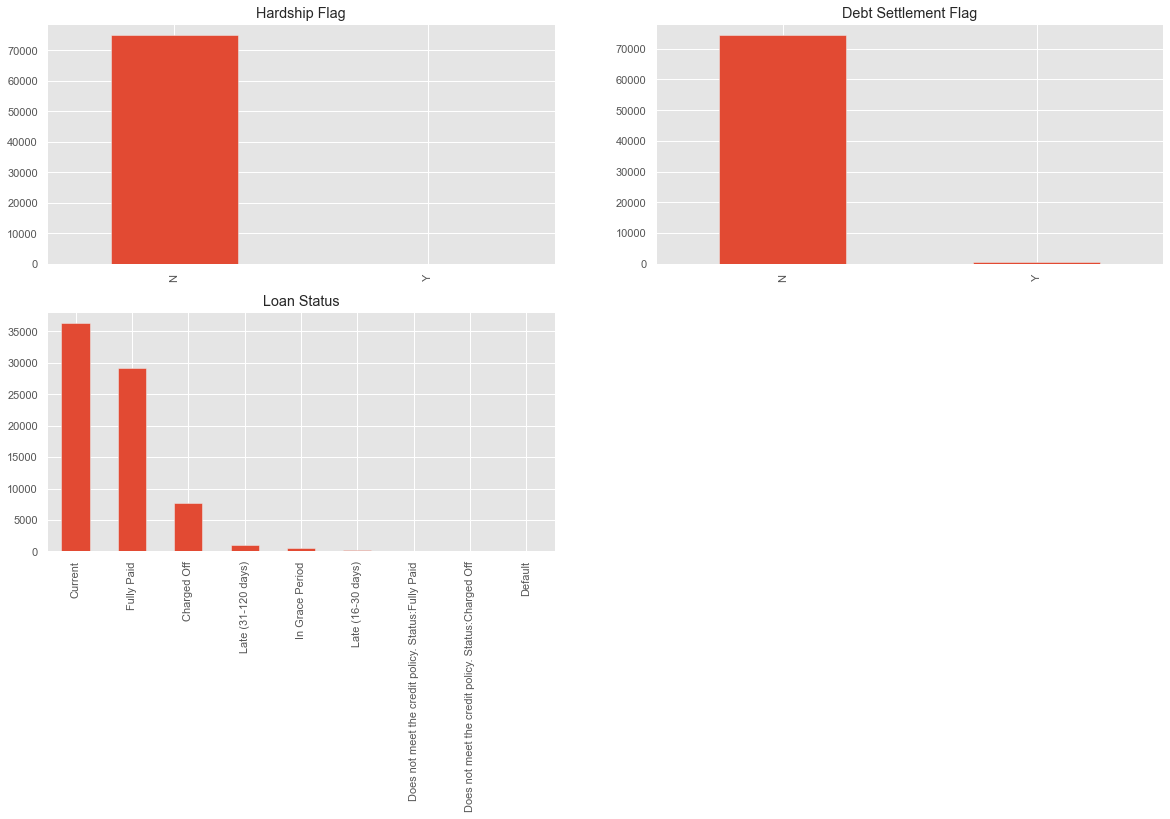

In [81]:
# Classes in categorical variables
plt.figure(1)
plt.subplot(321)
scoring.hardship_flag.value_counts().plot.bar(figsize=(20,15), title= 'Hardship Flag')

plt.subplot(322)
scoring.debt_settlement_flag.value_counts().plot.bar(title= 'Debt Settlement Flag')

plt.subplot(323)
scoring.loan_status.value_counts().plot.bar(title= 'Loan Status')

plt.show()

In [82]:
# Various categories of loan status
scoring.loan_status.value_counts()

Current                                                36323
Fully Paid                                             29111
Charged Off                                             7650
Late (31-120 days)                                      1084
In Grace Period                                          486
Late (16-30 days)                                        246
Does not meet the credit policy. Status:Fully Paid        60
Does not meet the credit policy. Status:Charged Off       36
Default                                                    4
Name: loan_status, dtype: int64

**Loan status will be grouped into three classes namely:**
* Current: All loans that are current or in grace period 
* Fully paid: All loans that have been paid in full
* Default: All loans that were charged off, late or defaulted

In [83]:
# Format classes of loan status variable
loan_stat_map = {
    'Current': 'Current',
    'Fully Paid': 'Fully Paid',
    'Charged Off': 'Default',
    'Late (31-120 days)': 'Default',
    'In Grace Period': 'Current',
    'Late (16-30 days)': 'Default',
    'Does not meet the credit policy. Status:Fully Paid': 'Fully Paid',
    'Does not meet the credit policy. Status:Charged Off': 'Default',
    'Default': 'Default',
}

formatted_df.loan_status = formatted_df.loan_status.map(loan_stat_map)

In [84]:
# Append variables to list
categorical.append('hardship_flag')
categorical.append('debt_settlement_flag')
categorical.append('loan_status')

In [146]:
ds.structdata.get_num_feats(scoring)

['fico_range_low',
 'fico_range_high',
 'tot_hi_cred_lim',
 'total_il_high_credit_limit',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'pub_rec',
 'last_fico_range_high',
 'last_fico_range_low',
 'tax_liens']

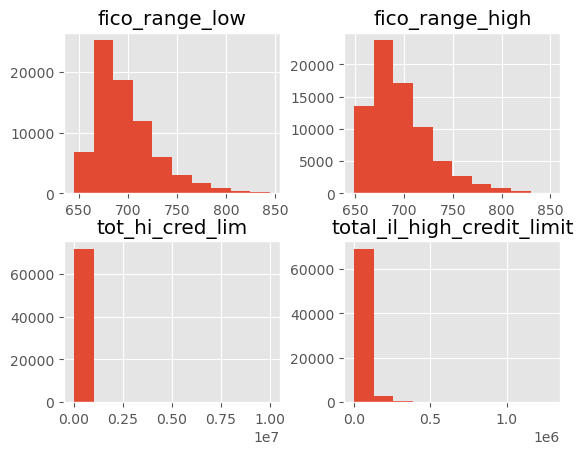

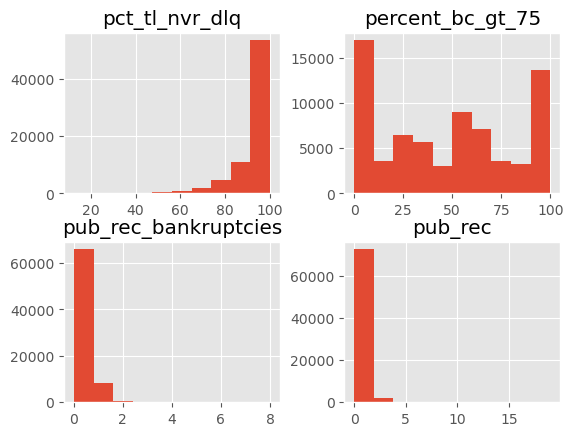

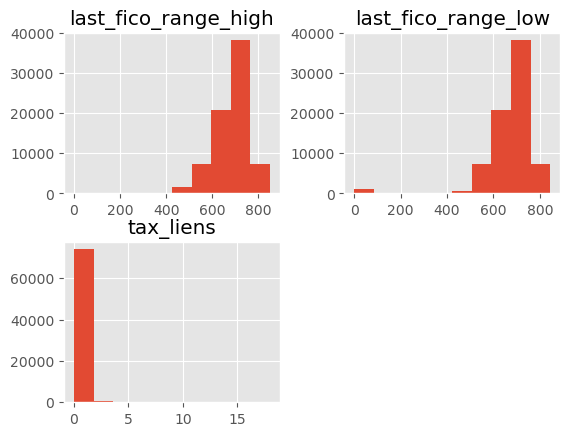

In [147]:
# Distribution of numeric variables
A = ['fico_range_low','fico_range_high','tot_hi_cred_lim','total_il_high_credit_limit']
B = ['pct_tl_nvr_dlq','percent_bc_gt_75','pub_rec_bankruptcies','pub_rec']
C = ['last_fico_range_high','last_fico_range_low','tax_liens']

score_rel1 = scoring[A]
score_rel2 = scoring[B]
score_rel3 = scoring[C]

score_rel1.hist()
score_rel2.hist()
score_rel3.hist()
plt.show()

#### Delinquency Related Variables

In [85]:
# Overview
ds.structdata.describe(delinq_rel)

First five data points


,id,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,tot_coll_amt,delinq_amnt,num_accts_ever_120_pd,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m
0,48654285,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5626429,1.0,23.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0
2,14660646,0.0,44.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
3,6607685,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60537487,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0




Random five data points


,id,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,tot_coll_amt,delinq_amnt,num_accts_ever_120_pd,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m
45136,53192283,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6791,12477663,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10572,64792489,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55234,85556689,0.0,NaN,0.0,271.0,0.0,0.0,0.0,0.0,0.0
50720,31216305,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0




Last five data points


,id,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,tot_coll_amt,delinq_amnt,num_accts_ever_120_pd,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m
74995,108749624,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74996,55278189,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
74997,119294633,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74998,40950548,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74999,114132327,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0




Shape of  data set: (75000, 10)


Size of  data set: 750000


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
id,object
delinq_2yrs,float64
mths_since_last_delinq,float64
acc_now_delinq,float64
tot_coll_amt,float64
delinq_amnt,float64
num_accts_ever_120_pd,float64
num_tl_120dpd_2m,float64
num_tl_30dpd,float64
num_tl_90g_dpd_24m,float64




Numerical Features in Data set
['delinq_2yrs', 'mths_since_last_delinq', 'acc_now_delinq', 'tot_coll_amt', 'delinq_amnt', 'num_accts_ever_120_pd', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m']


Categorical Features in Data set


['id']



Statistical Description of Columns


,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,tot_coll_amt,delinq_amnt,num_accts_ever_120_pd,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m
count,75000.000000,38091.000000,75000.000000,72013.000000,75000.000000,72013.000000,69426.000000,72013.000000,72013.000000
mean,0.341320,33.606127,0.005373,252.727771,12.697840,0.527294,0.000706,0.003763,0.092483
std,0.907909,21.858932,0.077875,3655.436179,754.723823,1.371663,0.027621,0.064757,0.512658
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,158.000000,3.000000,848438.000000,88216.000000,51.000000,2.000000,3.000000,30.000000




Description of Categorical Features


,count,unique,top,freq
id,75000,75000,3703903,1




Unique class Count of Categorical features


,Feature,Unique Count
0,id,75000




Missing Values in Data


,features,missing_counts,missing_percent
0,id,0,0.0
1,delinq_2yrs,0,0.0
2,mths_since_last_delinq,36909,49.2
3,acc_now_delinq,0,0.0
4,tot_coll_amt,2987,4.0
5,delinq_amnt,0,0.0
6,num_accts_ever_120_pd,2987,4.0
7,num_tl_120dpd_2m,5574,7.4
8,num_tl_30dpd,2987,4.0
9,num_tl_90g_dpd_24m,2987,4.0


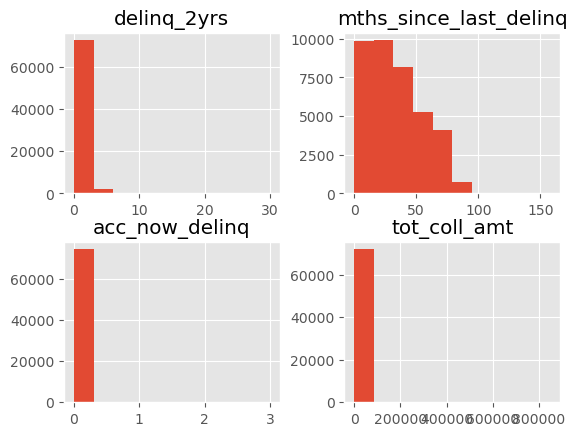

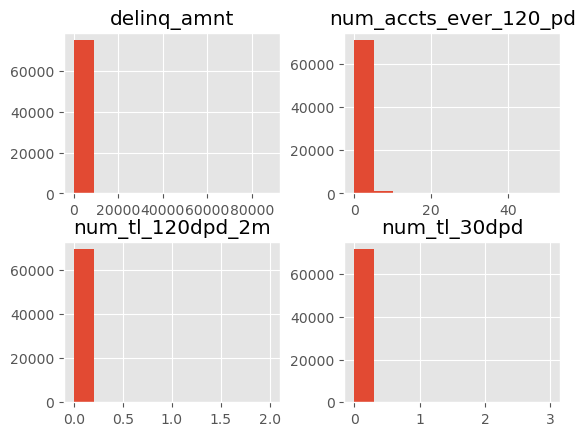

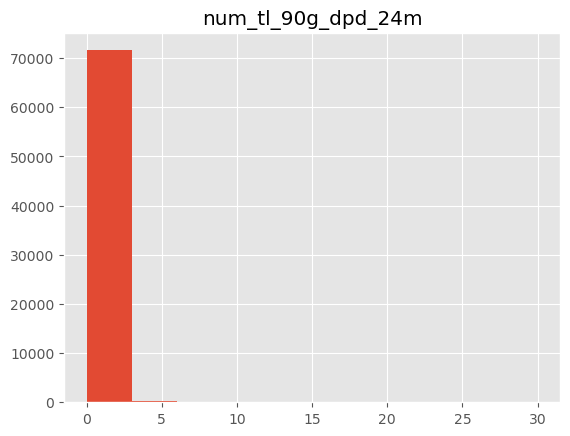

In [157]:
# Distribution of numeric variables
A = ['delinq_2yrs','mths_since_last_delinq','acc_now_delinq','tot_coll_amt']
B = ['delinq_amnt','num_accts_ever_120_pd','num_tl_120dpd_2m','num_tl_30dpd']
C = ['num_tl_90g_dpd_24m']

delinq_rel1 = delinq_rel[A]
delinq_rel2 = delinq_rel[B]
delinq_rel3 = delinq_rel[C]

delinq_rel1.hist()
delinq_rel2.hist()
delinq_rel3.hist()
plt.show()

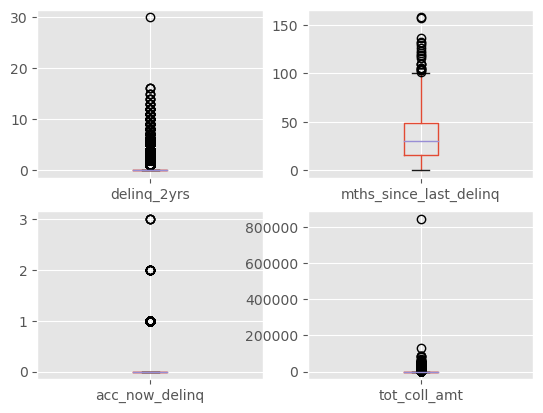

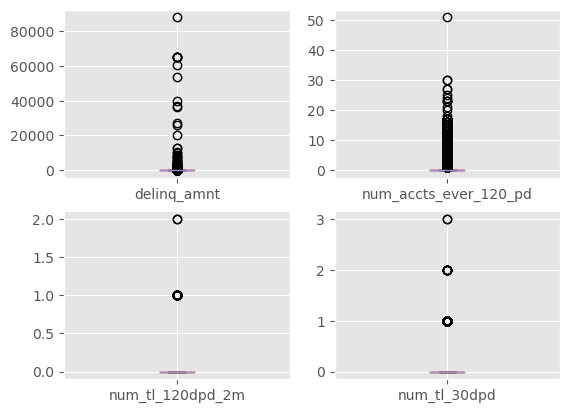

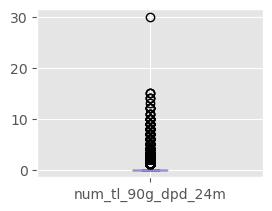

In [159]:
# Outliers
delinq_rel1.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
delinq_rel2.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
delinq_rel3.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

## Outliers in data

In [214]:
# Get count of outlier values in every column
def outlier_value_count(df):
    num_feats = ds.structdata.get_num_feats(df)
    Q1=df[num_feats].quantile(0.05)
    Q3=df[num_feats].quantile(0.95)
    IQR=Q3-Q1
    lower_bound=Q1 - 1.5 * IQR
    upper_bound=Q3 + 1.5 * IQR
    return ((df[num_feats] < lower_bound) | (df[num_feats] > upper_bound)).sum()


#Show outlier count in entire data
# Outlier value count of historical customer data
print("Outlier value count of loan data")
outlier_value_count(formatted_df)

Outlier value count of loan data


loan_amnt                        0
funded_amnt                      0
installment                      0
annual_inc                     326
dti                             46
delinq_2yrs                    367
fico_range_low                   0
fico_range_high                  0
inq_last_6mths                  66
mths_since_last_delinq           0
open_acc                        23
pub_rec                        812
revol_util                       0
total_acc                        6
last_fico_range_high            14
last_fico_range_low           1017
acc_now_delinq                 380
tot_coll_amt                  1718
tot_cur_bal                    140
total_rev_hi_lim               337
acc_open_past_24mths            42
avg_cur_bal                    212
bc_open_to_buy                 283
bc_util                          1
delinq_amnt                    278
mo_sin_old_il_acct               5
mo_sin_old_rev_tl_op             0
mo_sin_rcnt_rev_tl_op          246
mo_sin_rcnt_tl      

### Customer Related Variables

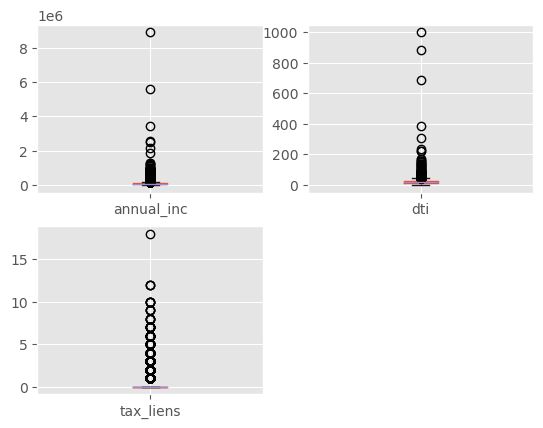

In [160]:
# Outliers in customer related variables
customer_rel.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

### Grade Related Variables

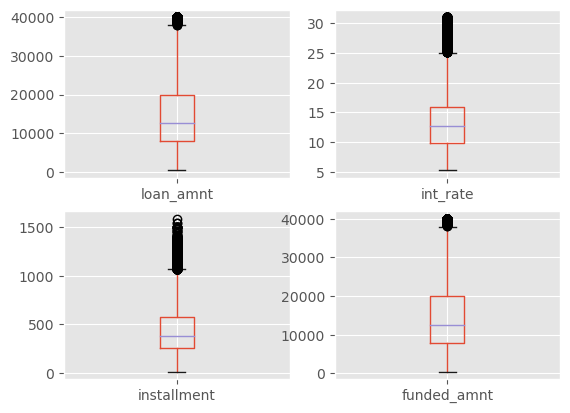

In [161]:
# Outliers in grade related variables
grade_rel.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

### Account Related Variables

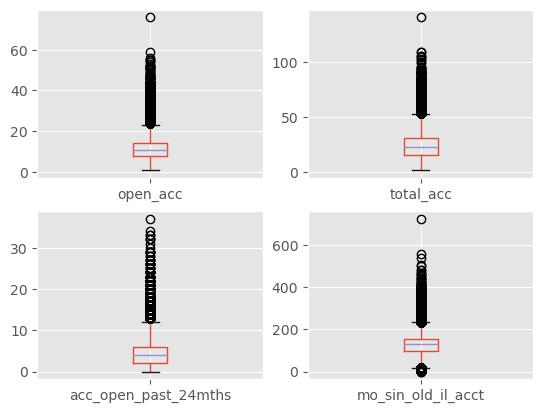

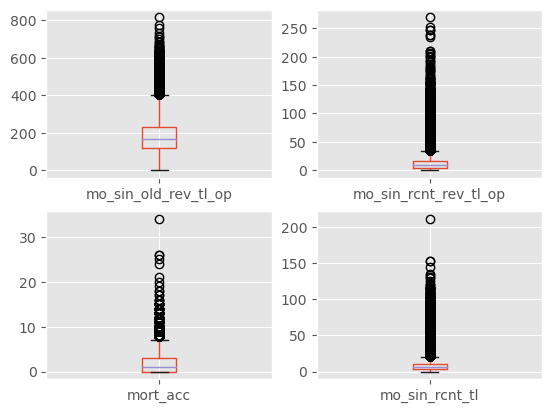

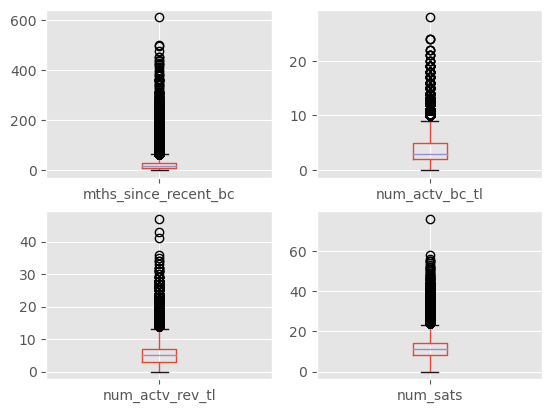

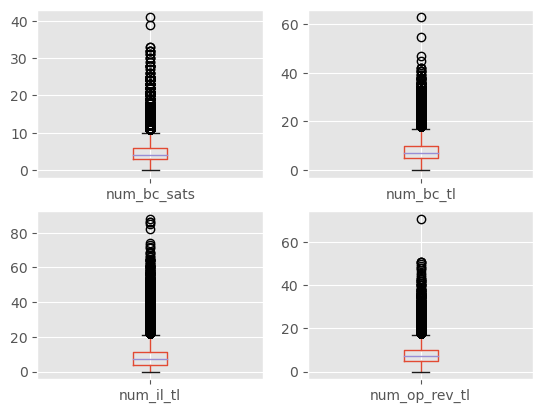

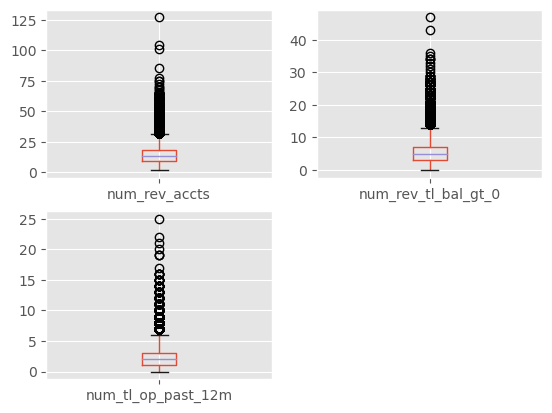

In [162]:
# Outliers in account related variables
acct_rel1.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
acct_rel2.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
acct_rel3.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
acct_rel4.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
acct_rel5.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

### Balance Related Variables

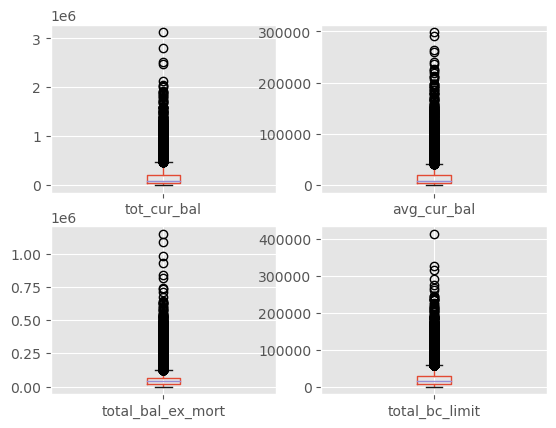

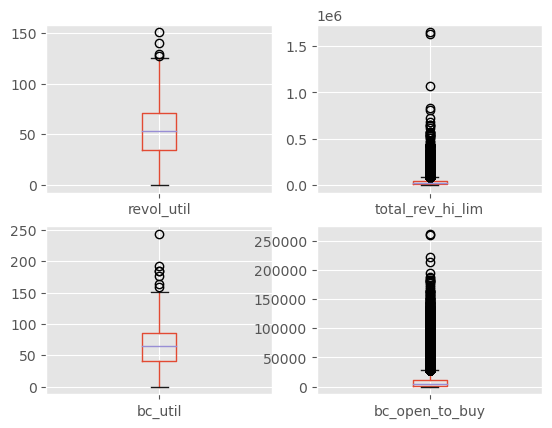

In [163]:
# Outliers in balance related variables
bal_rel1.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
bal_rel2.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

### Scoring Related Variables

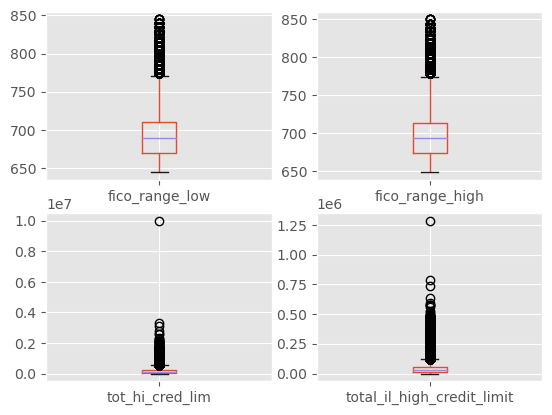

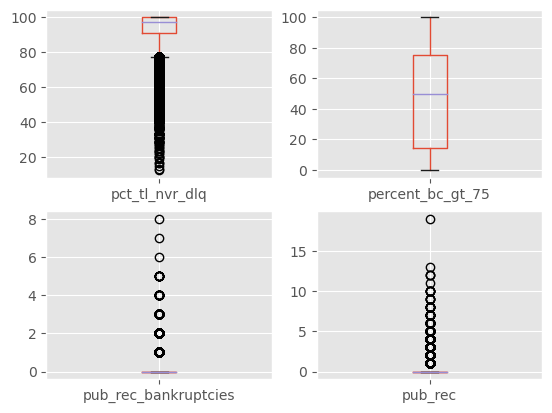

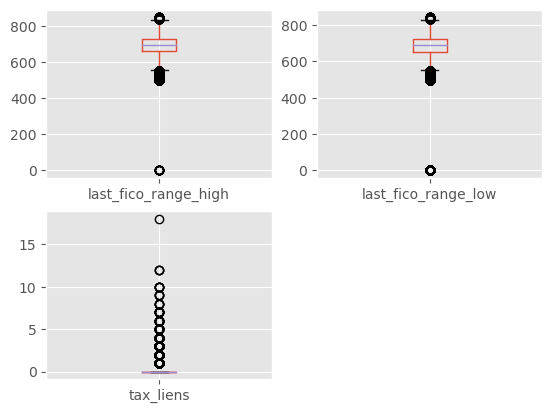

In [164]:
# Outliers in scoring related variables
score_rel1.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
score_rel2.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
score_rel3.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

### Delinquency Related Variables

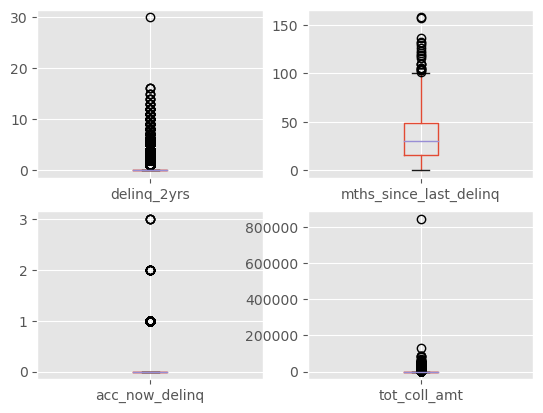

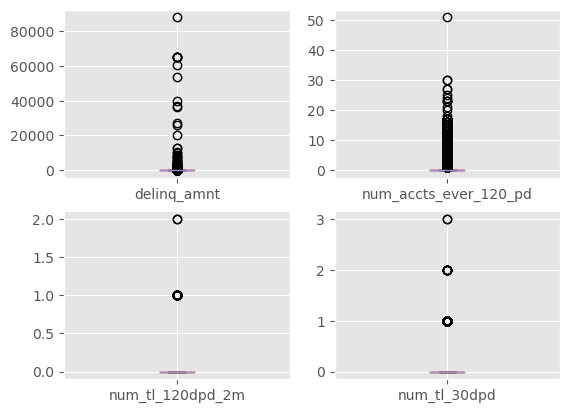

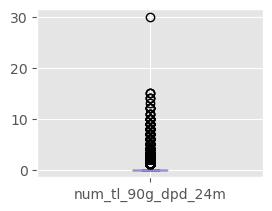

In [165]:
# Outliers in delinquency related variables
delinq_rel1.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
delinq_rel2.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
delinq_rel3.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

## Multivariate Analysis
### Correlation between Variables

<AxesSubplot:>

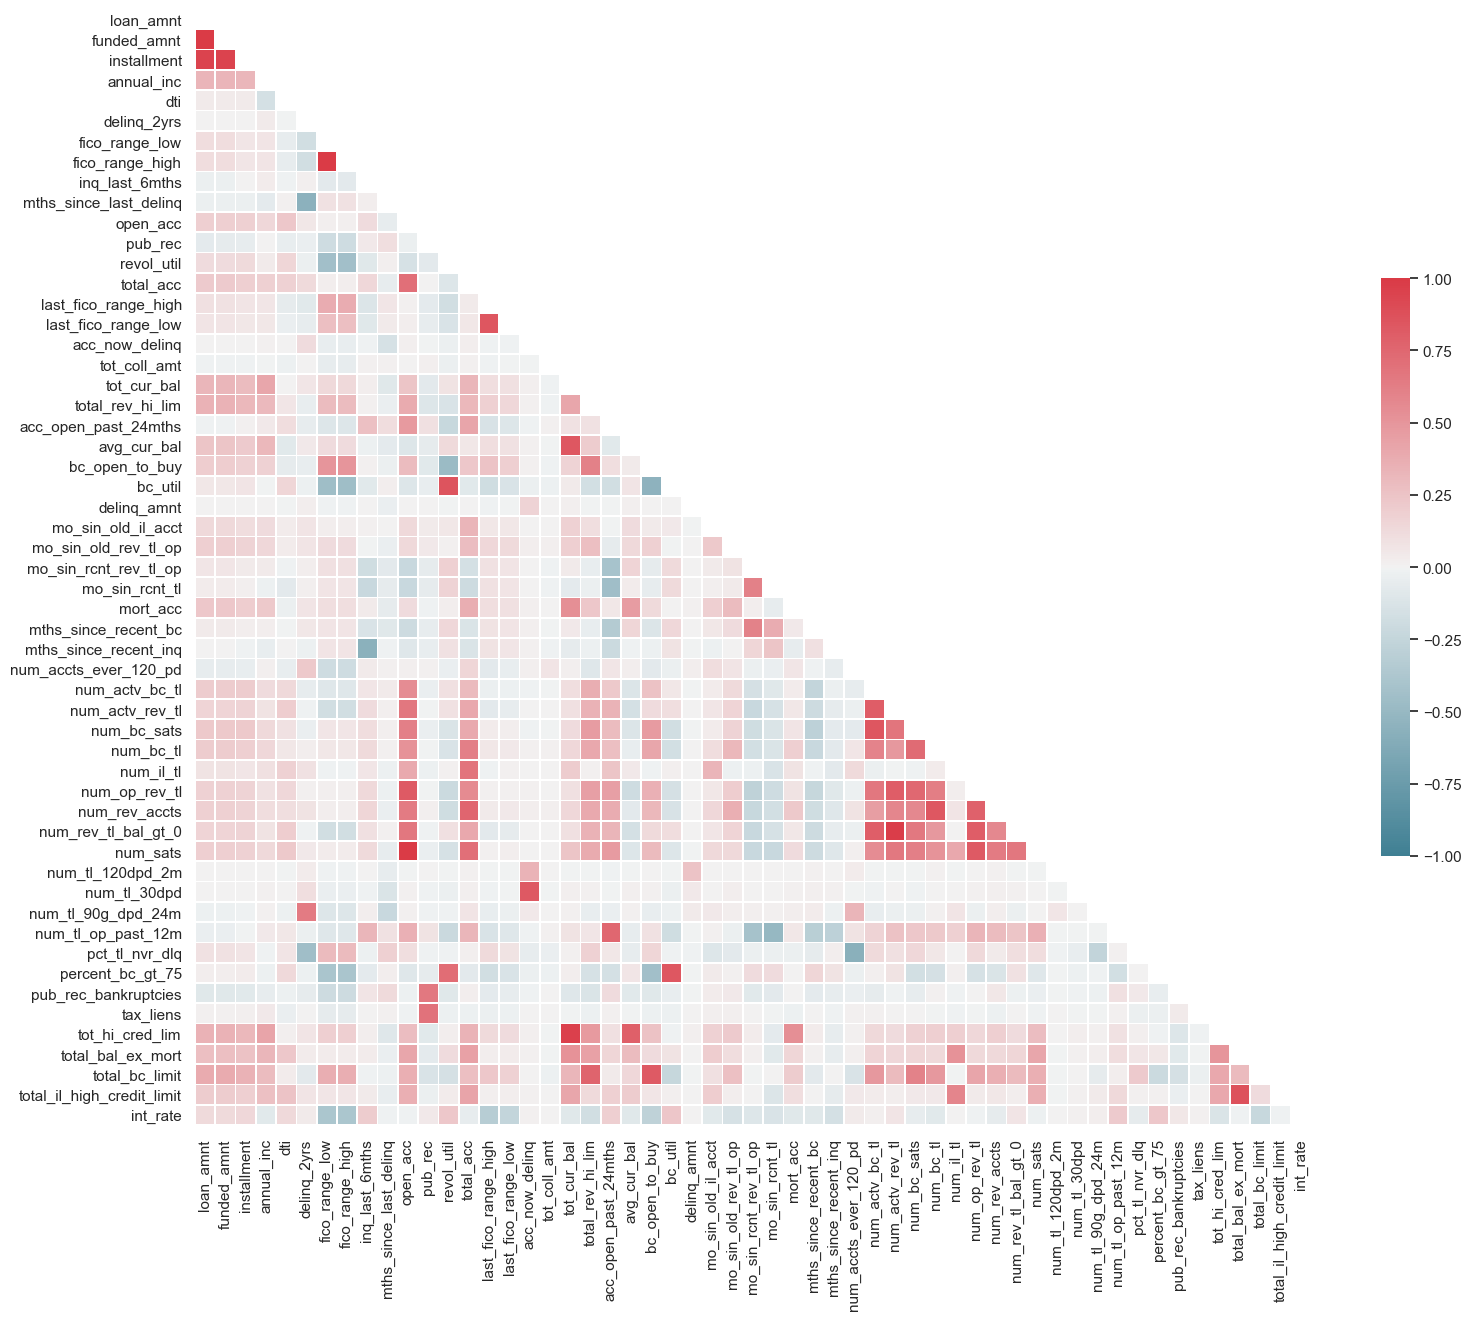

In [172]:
#Set and compute the Correlation Matrix:
sns.set(style="white")
corr = formatted_df.corr()
#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Correlations to Target Variable

In [187]:
formatted_df.grade.value_counts()

C    22465
B    22114
A    12264
D    10844
E     5136
F     1701
G      476
Name: grade, dtype: int64

In [188]:
cols = ds.structdata.get_num_feats(formatted_df)
cols.append('grade')
data = formatted_df[cols]

correlations = data.corrwith(data.int_rate)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 bc_util                  0.236273
percent_bc_gt_75         0.233381
revol_util               0.231003
num_tl_op_past_12m       0.212057
inq_last_6mths           0.206919
acc_open_past_24mths     0.191278
installment              0.144183
dti                      0.139755
funded_amnt              0.132023
loan_amnt                0.131930
num_rev_tl_bal_gt_0      0.077126
num_actv_rev_tl          0.076774
pub_rec_bankruptcies     0.055168
pub_rec                  0.049914
num_accts_ever_120_pd    0.039641
delinq_2yrs              0.039206
num_tl_90g_dpd_24m       0.026884
num_actv_bc_tl           0.018532
tax_liens                0.013736
acc_now_delinq           0.011336
num_tl_30dpd             0.011155
delinq_amnt              0.007383
num_tl_120dpd_2m         0.004326
tot_coll_amt             0.002940
num_il_tl                0.001500
dtype: float64

Most Negative Correlations: 
 total_bal_ex_mort            -0.010390
mths_since_last_delinq       -0.011

In [190]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'last_fico_range_high', 'last_fico_range_low',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_c

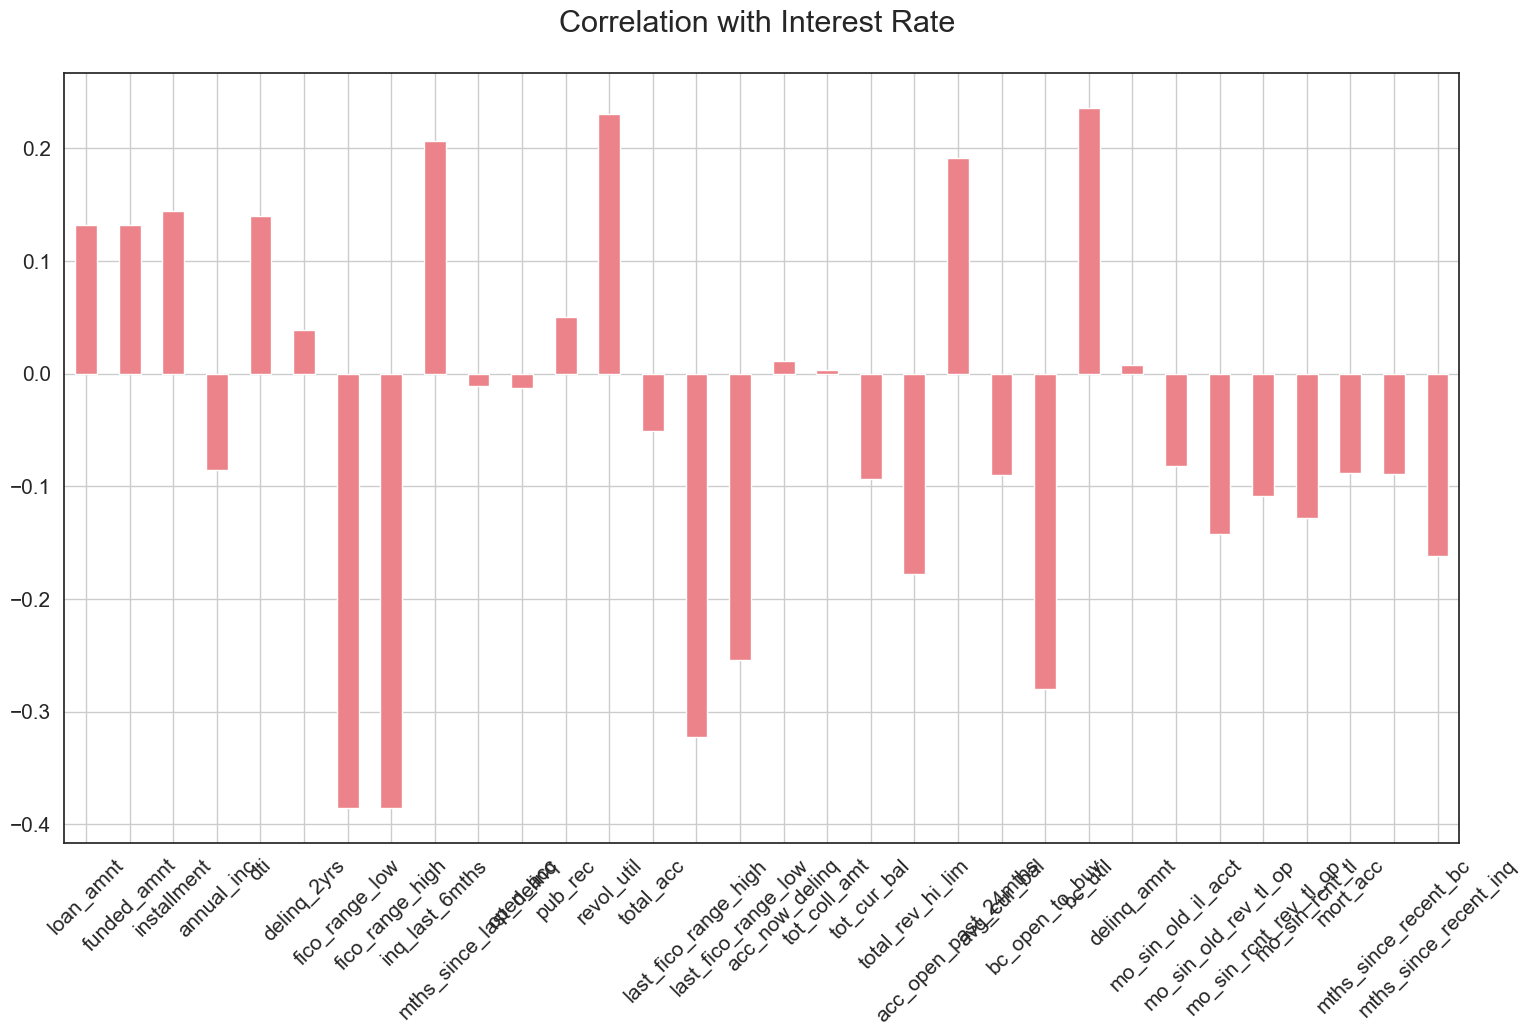

In [197]:
col_set1 = ['loan_amnt', 'funded_amnt', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'last_fico_range_high', 'last_fico_range_low',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'mths_since_recent_inq']

col_set2 = ['num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'int_rate']
# Plot Correlations
def plot_corr_with_target(df, col_set):
    correlations = data[col_set].corrwith(df.int_rate)
    correlations = correlations[correlations!=1]
    correlations.plot.bar(
            figsize = (18, 10), 
            fontsize = 15, 
            color = '#ec838a',
            rot = 45, grid = True)
    plt.title('Correlation with Interest Rate \n',
              horizontalalignment="center", fontstyle = "normal", 
              fontsize = "22", fontfamily = "sans-serif")

# plot correlation of both set of variables with interest rate
plot_corr_with_target(data, col_set1)

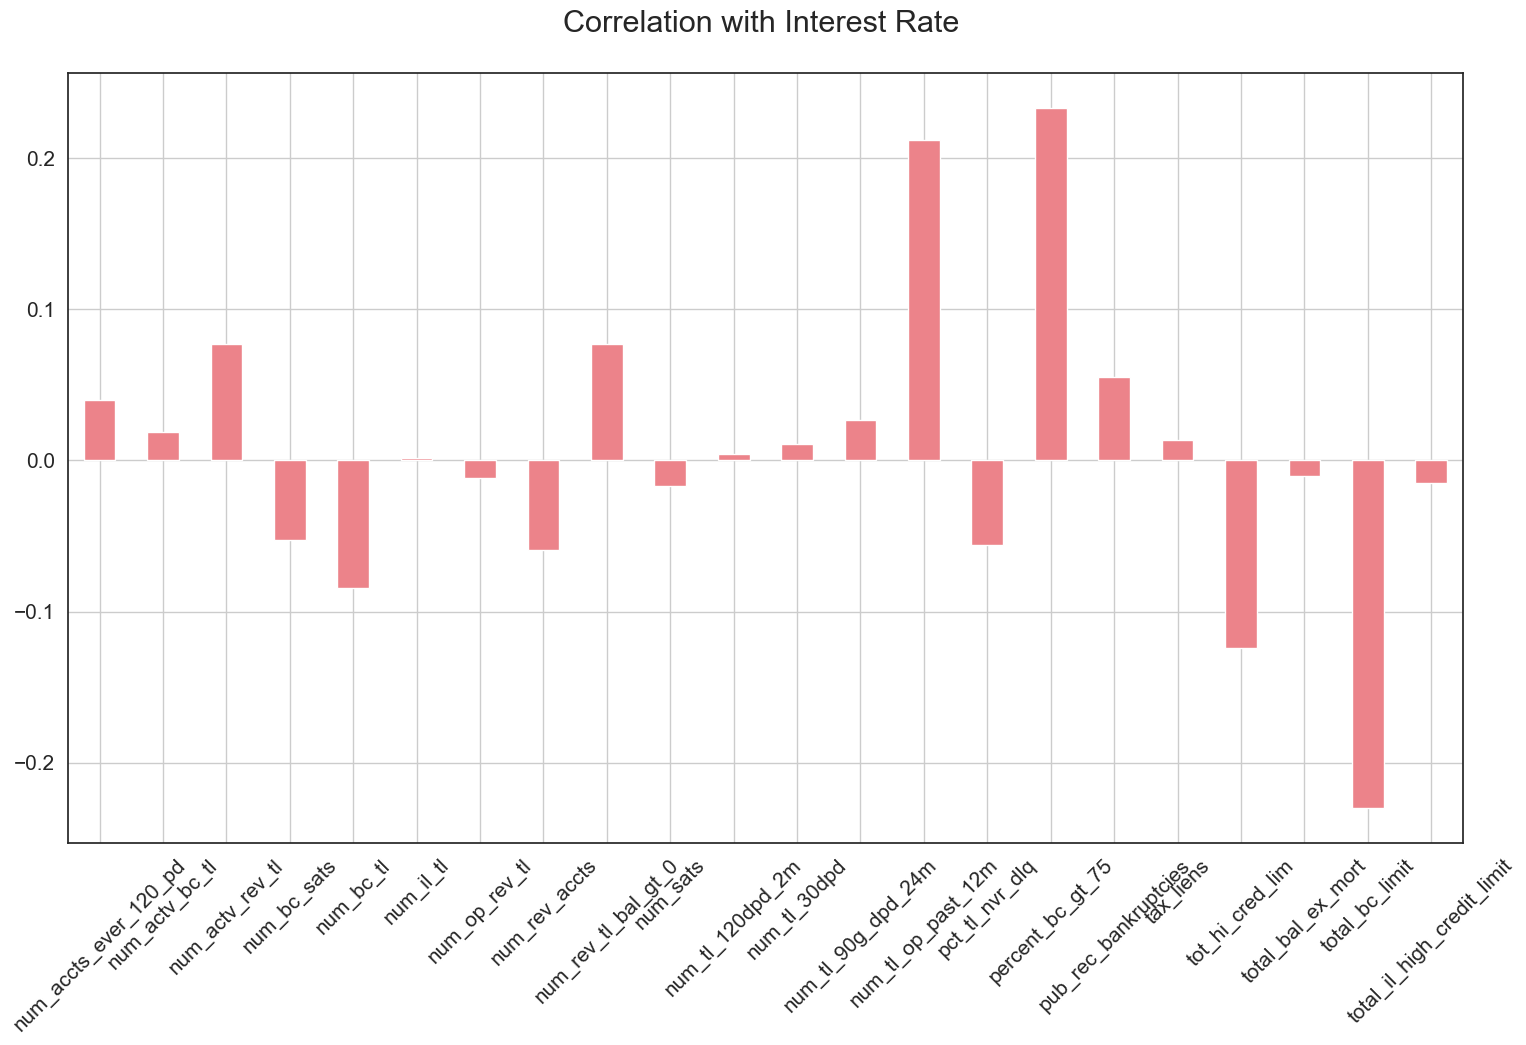

In [198]:
# plot correlation of both set of variables with interest rate
plot_corr_with_target(data, col_set2)

In [199]:
formatted_df.grade.value_counts()

C    22465
B    22114
A    12264
D    10844
E     5136
F     1701
G      476
Name: grade, dtype: int64

In [ ]:
loan_data.int

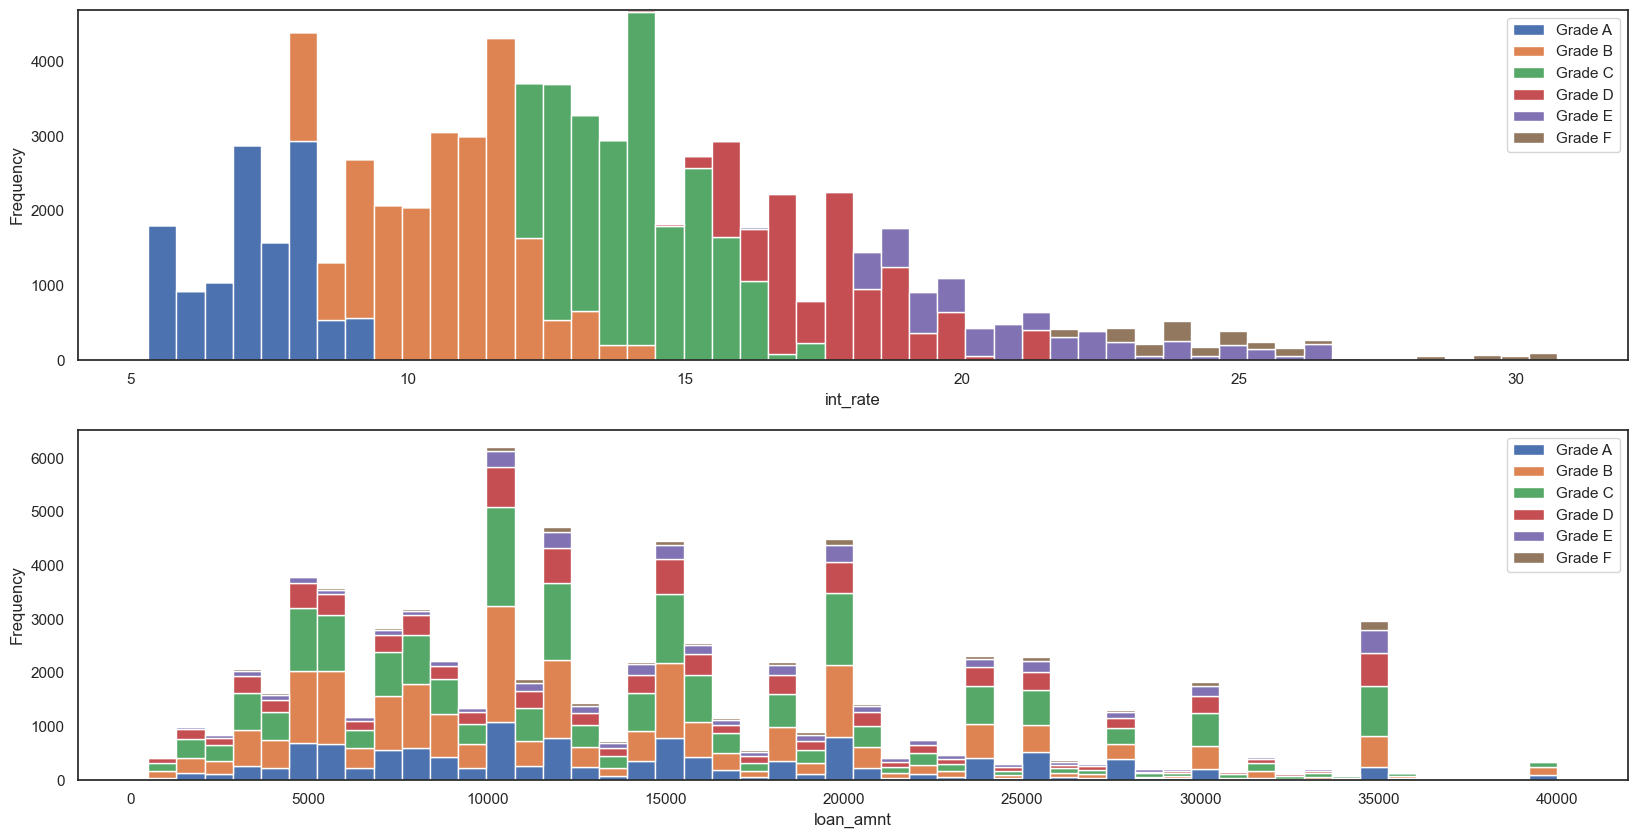

In [205]:
# Function to plot distributions
def plot_distributions(df,col,ax):
    data = pd.DataFrame({"Grade A":df[df["grade"]=='A'][col],
                     "Grade B":df[df["grade"]=='B'][col],
                        "Grade C":df[df["grade"]=='C'][col],
                        "Grade D":df[df["grade"]=='D'][col],
                        "Grade E":df[df["grade"]=='E'][col],
                        "Grade F":df[df["grade"]=='F'][col],
                        "Grade G":df[df["grade"]=='G'][col]})
    data[["Grade A","Grade B","Grade C","Grade D","Grade E", "Grade F"]].plot(kind='hist',bins=50,
                                 ax=ax,stacked=True)
    ax.set_xlabel(col)
    ax.ticklabel_format(style='plain',axis='x')
    
# Relationship between loan grade and interest rate and loan amount
fig,ax=plt.subplots(nrows=2,figsize=(20,10))
plot_distributions(data,'int_rate',ax[0])
plot_distributions(data,'loan_amnt',ax[1])

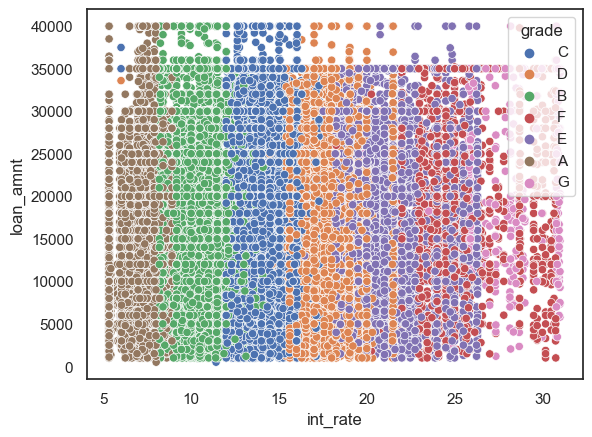

In [208]:
sns.scatterplot(x="int_rate", y="loan_amnt",
              hue="grade",
              data=formatted_df);


## Check Multicollinearity using Variable Inflation Factor(IVF)

In [210]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [213]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
cols = ds.structdata.get_num_feats(formatted_df)
data = formatted_df[cols]
# Fill missing value with zero 
calc_vif(data.fillna(0))

,variables,VIF
0,loan_amnt,6338.20044
1,funded_amnt,6392.36824
2,installment,39.84413
3,annual_inc,3.33376
4,dti,5.38872
5,delinq_2yrs,2.51644
6,fico_range_low,42463329.75046
7,fico_range_high,42543865.74761
8,inq_last_6mths,2.02682
9,mths_since_last_delinq,1.96425


Although the predictive power or reliability of machine learning algorithms is generally not affected by the multicollinearity of variables, the importance of variables with high collinearity will be offset by each other, thereby affecting the overall interpretability of the predictor variables.

**For this usecase I will try using PCA and removal of collinear variables to correct the effect of multi-collinearity**

ref: https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/